## Telecom Churn

####  Business issue Ovrview

Within the telecom sector, customers have the option to select from a variety of service providers and readily switch from one operator to another. This sector, characterized by intense competition, witnesses an annual churn rate averaging between 15-25%. Recognizing the reality that acquiring a new customer is 5-10 times more costly compared to retaining an existing one, the emphasis has shifted towards prioritizing customer retention over customer acquisition.

###Churn Definitions
Churn can be defined through different perspectives, including: 1. Revenue-based churn 2. Usage-based churn

In the context of this project, the chosen approach is the usage-based definition for identifying churn.

Churn is identified among customers who haven't engaged in any calls, internet usage, or other outgoing or incoming activities over a specific duration (usage-based churn).

This definition comes with a potential limitation as it might be challenging to implement corrective actions to retain a client once they have discontinued using the services for a period. For instance, setting a "two-months zero usage" threshold for defining churn may render projections of attrition meaningless, as the client could have already switched to another operator by that time.

###### business objectiv

Leveraging data (features) from the initial three months, the objective for the business is to predict churn in the latest month, which is the ninth month in this context. Gaining insights into typical consumer behavior during churn is essential for successfully achieving this goal.

#### Data Overview

The dataset encompasses customer-level details over a continuous four-month period - specifically, June, July, August, and September. These months are represented by the numerical codes 6, 7, 8, and 9, respectively.

Filename* =telecom_churn_data.csv

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read file in google collab
#frm google.colab import files
#uploaded = files.upload()

In [3]:
import io
tell = pd.read_csv('telecom_churn_data.csv')

In [4]:
tell.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
tell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Number of customers
print("Unique customers/MSISDN in the data: %d"%len(tell.mobile_number.unique()))

Unique customers/MSISDN in the data: 99999


In [7]:
#columns and features list
pd.DataFrame(tell.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


## Data Cleaning


In [8]:
#mssing value % in the feature
total_missing = round(100*(tell.isnull().sum()/tell.shape[0]))
total_missing.sort_values(ascending= False)

arpu_3g_6                   75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
total_rech_data_6           75.0
max_rech_data_6             75.0
                            ... 
max_rech_amt_7               0.0
max_rech_amt_6               0.0
total_rech_amt_9             0.0
total_rech_amt_8             0.0
sep_vbc_3g                   0.0
Length: 226, dtype: float64

In [9]:
#having more than 50% missng value
len(total_missing.loc[total_missing > 50])

40

In [10]:
#fourty column names which have higher than 50% missng value
total_missing.sort_values(ascending= False).head(40)

arpu_3g_6                   75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
total_rech_data_6           75.0
max_rech_data_6             75.0
count_rech_2g_6             75.0
fb_user_6                   75.0
count_rech_3g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
night_pck_user_8            74.0
av_rech_amt_data_8          74.0
arpu_3g_9                   74.0
total_rech_data_9           74.0
night_pck_user_9            74.0
total_rech_data_8           74.0
total_rech_data_7           74.0
av_rech_amt_data_7          74.0
max_rech_data_8             74.0
date_of_last_rech_data_9    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_7    74.0
night_pck_user_7            74.0
arpu_3g_7                   74.0
arpu_2g_8                   74.0
arpu_3g_8                   74.0
max_rech_data_7             74.0
count_rech_2g_9             74.0
fb_user_7                   74.0
count_rech_3g_9             74.0
fb_user_9 

#As evident, numerous attributes are vital for analysis and should not be overlooked. Consequently, it is imperative to scrutinize and address any missing values. In the case of these features, where no values are apparent for the customers, it is reasonable to consider assigning them a value of 0.

In [11]:
drrCol = ['fb_user','night_pck_user']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in drrCol]:
   tell.drop([col],axis =1 ,inplace=True)

In [12]:
#Considering the significance of av_rech_amt_data_* features in identifying high-value customers,
# it is prudent to fill in the missing values for av_rech_amt_data_* with 0.
immCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in immCol]:
  tell[col].fillna(0, inplace=True)

In [13]:
total_missing = round(100*(tell.isnull().sum()/tell.shape[0]))
len(total_missing.loc[total_missing > 50])

4

#Presently, four features within our dataset contain missing values, collectively amounting to more than 50%. Given their limited significance for analysis, we can safely exclude them from our considerations.

In [14]:
total_missing.sort_values(ascending=False).head(4)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_9    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_7    74.0
dtype: float64

In [15]:
#date_of_last_rech_data_6 ,,date_of_last_rech_data_7,, date_of_last_rech_data_8,, date_of_last_rech_data_9
miscol = [ 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
tell.drop(miscol, axis = 1,inplace= True)
tell.shape

(99999, 214)

In [16]:
#values mssing more than 5%
total_missing = round(100*(tell.isnull().sum()/tell.shape[0]))
len(total_missing.loc[total_missing > 5])

29

29 of our characteristics have missing data that are greater than 5%.
Let's look at the names of the features.

In [17]:
total_missing.sort_values(ascending=False).head(29)

isd_og_mou_9        8.0
loc_ic_mou_9        8.0
loc_ic_t2f_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2t_mou_9    8.0
roam_og_mou_9       8.0
og_others_9         8.0
loc_og_t2t_mou_9    8.0
spl_og_mou_9        8.0
loc_og_t2m_mou_9    8.0
std_og_mou_9        8.0
std_og_t2c_mou_9    8.0
loc_og_t2f_mou_9    8.0
std_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2t_mou_9    8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
loc_og_mou_9        8.0
std_ic_t2m_mou_9    8.0
std_ic_t2t_mou_9    8.0
spl_ic_mou_9        8.0
std_ic_t2o_mou_9    8.0
isd_ic_mou_9        8.0
std_ic_t2f_mou_9    8.0
ic_others_9         8.0
onnet_mou_9         8.0
std_ic_mou_9        8.0
dtype: float64

#As observed, all these features are linked to the '9', indicating the customer's data for the 9th month. It is essential to investigate whether the absence of data is consistent across all columns for the same set of customers.

In [18]:
miscol =['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']
tell[tell[miscol].isnull().all(axis=1)][miscol].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
tell[tell[miscol].isnull().all(axis=1)][miscol]

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that for 7745 Customers, each of these characteristics is worthless and empty. We have the option to also impute these values with 0.

In [20]:
for col in [y for y in miscol]:
    tell[col].fillna(0, inplace=True)

In [21]:
tell=tell[~tell[miscol].isnull().all(axis=1)]
tell.shape

(99999, 214)

In [22]:
#Missing values more than 2%
total_missing = round(100*(tell.isnull().sum()/tell.shape[0]))
len(total_missing.loc[total_missing > 2])

89

In [23]:
total_missing.sort_values(ascending=False).head(89)

std_ic_t2m_mou_8    5.0
loc_og_t2c_mou_8    5.0
roam_og_mou_8       5.0
std_ic_t2t_mou_8    5.0
std_og_t2c_mou_8    5.0
                   ... 
std_og_t2t_mou_7    4.0
onnet_mou_6         4.0
std_og_t2f_mou_7    4.0
std_og_t2t_mou_6    4.0
std_og_t2m_mou_7    4.0
Length: 89, dtype: float64

#These features collectively exhibit 5 missing values, which corresponds to approximately 4% of the total data. It is crucial to examine whether these features share common rows with missing values.

In [24]:
miscol = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'date_of_last_rech_8', 'date_of_last_rech_9']
tell[tell[miscol].isnull().all(axis=1)][miscol].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
tell[tell[miscol].isnull().all(axis=1)][miscol]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#There are 381 customers for whom all these attributes hold no value. Let's proceed to eliminate these clients from the database.

In [26]:
tell=tell[~tell[miscol].isnull().all(axis=1)]
tell.shape

(99618, 214)

In [27]:
#For the remaining customers where these missing values are scattered, we can address them by filling the gaps with zero.
miscol.remove('date_of_last_rech_8')
miscol.remove('date_of_last_rech_9')
for col in [y for y in miscol]:
    tell[col].fillna(0, inplace=True)

In [28]:
#Mising value
total_missing = round(100*(tell.isnull().sum()/tell.shape[0]))
len(total_missing.loc[total_missing > 0])

9

#There are still 9 features within the dataset that contain missing values.

In [29]:
total_missing.sort_values(ascending=False).head(9)

date_of_last_rech_9     4.0
date_of_last_rech_8     3.0
last_date_of_month_8    1.0
date_of_last_rech_7     1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
loc_ic_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_og_t2o_mou          1.0
dtype: float64

In [30]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,tell[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [31]:
#Some of these features take only one value. So we can  impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(tell[c].value_counts())
    tell[c].fillna(tell[c].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [32]:
#Mising value
total = round(100*(tell.isnull().sum()/tell.shape[0]))
len(total_missing.loc[total_missing > 0])

9

In [33]:
total_missing.sort_values(ascending=False).head(4)

date_of_last_rech_9     4.0
date_of_last_rech_8     3.0
last_date_of_month_8    1.0
date_of_last_rech_7     1.0
dtype: float64

#We can replace the missing values in features indicating the most recent recharge date by substituting them with the last day of that respective month.

In [34]:
tell['date_of_last_rech_6'].fillna('6/30/2014', inplace = True)
tell['date_of_last_rech_7'].fillna('7/31/2014', inplace = True)
tell['date_of_last_rech_8'].fillna('8/31/2014', inplace = True)
tell['date_of_last_rech_9'].fillna('9/30/2014', inplace = True)

In [35]:
#Mising value
total_missing = round(100*(tell.isnull().sum()/tell.shape[0]))
len(total_missing.loc[total_missing > 0])

0

In [36]:
#columns value as 0

colms_as_zero=tell.columns[(tell == 0).all()]
colms_as_zero

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [37]:
# Given that all the mentioned columns have values of 0, we can proceed to eliminate them.

tell.drop(colms_as_zero,axis=1,inplace=True)

### Now, let's determine the percentage of remaining data after addressing the missing values.

In [38]:
print("Percentage of data remaining after treating missing values: {}%".format(round(tell.shape[0]/99999 *100,2)))
print ("Number of users: {}".format(tell.shape[0]))
print ("Number of features: {}".format(tell.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of users: 99618
Number of features: 203


In [39]:
#datatypes of the columns

tell.reset_index(inplace=True,drop=True)
# colums which store date
date_cols = list(tell.filter(regex='date').columns)
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [40]:
# Let's change the data type of the date columns to datetime.
for col in date_cols:
    tell[col] = pd.to_datetime(tell[col], format='%m/%d/%Y')

In [41]:
tell['last_date_of_month_6'].unique()

array(['2014-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

### The latest date of the month is not essential. We can proceed to remove these columns.

In [42]:
tell.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9',], axis =1, inplace = True)

In [43]:
#Checkn the datatype (datetime,float or int)
tell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 199 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(160), int64(35)
memory usage: 151.2 MB


In [44]:
tell.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=199)

#### Some monthly variables (_6, _7, _8, _9) deviate from the usual naming convention.


In [45]:
#The full date isn't necessary, so we can substitute it with only the day.
tell['date_of_last_rech_6'] = pd.to_datetime(tell.date_of_last_rech_6).dt.day
tell['date_of_last_rech_7'] = pd.to_datetime(tell.date_of_last_rech_7).dt.day
tell['date_of_last_rech_8'] = pd.to_datetime(tell.date_of_last_rech_8).dt.day

## Filtering high value customers

Our primary focus is to predict churn for high-value clients, as previously highlighted. For instance, we can identify high-value clients as those who have recharged an amount equal to or exceeding X, where X represents the 70th percentile of the typical recharge amount during the initial two months, which we consider as the favorable phase.

In [46]:
reccoll = tell.filter(regex=('count')).columns
tell[reccoll].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating derive column .

The derived column serves the dual purpose of enhancing data representation and facilitating model construction.

In [47]:
#vol_data_mb_6/ vol_data_mb_7/ vol_data_mb_8/ vol_data_mb_9. 
#we can apply the 2G+3G data together

for i in range(6,10):
    tell['vol_data_mb_'+str(i)] = (tell['vol_2g_mb_'+str(i)]+tell['vol_3g_mb_'+str(i)]).astype(int)

In [48]:
drrCol = ['vol_2g_mb','vol_3g_mb']
for col in [y + s for s in ['_6','_7','_8',] for y in drrCol]:
   tell.drop([col],axis =1 ,inplace=True)

In [49]:
#"avg_rech_amt_6/"avg_rech_amt_7"/"avg_rech_amt_8"/"avg_rech_amt_9"

#it is goining to keep average recharge value of each customer in every month
for i in range(6,10):
    tell['avg_rech_amt_'+str(i)] = round(tell['total_rech_amt_'+str(i)]/tell['total_rech_num_'+str(i)]+1,2)

In [50]:
#"total_rech_num_data_6"/"total_rech_num_data_7"/"total_rech_num_data_8"/"total_rech_num_data_9"

#It will keep the  number of data recharge ("count_rech_2g+count_rech_3g" ) for all month

for i in range(6,10):
    tell['total_rech_num_data_'+str(i)] = (tell['count_rech_2g_'+str(i)]+tell['count_rech_3g_'+str(i)]).astype(int)

In [51]:
drrCol = ['count_rech_2g','count_rech_3g']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in drrCol]:
   tell.drop([col],axis =1 ,inplace=True)

In [52]:
#"total_rech_amt_data_6"/"total_rech_amt_data_7"/"total_rech_amt_data_8"/"total_rech_amt_data_9"

#It will keep the total amount data recharge ("total_rech_num_data" * "av_rech_amt_data" ) for all months.

for i in range(6,10):
    tell['total_rech_amt_data_'+str(i)] = tell['total_rech_num_data_'+str(i)]*tell['av_rech_amt_data_'+str(i)]

In [53]:
#"total_month_rech_6"/"total_month_rech_7"/"total_month_rech_8"/"total_month_rech_9"

#It will keep total recharge amount ("total_rech_amt"+"total_rech_amt_data" )  each customer, for all months.

for i in range(6,10):
    tell['total_month_rech_'+str(i)] = tell['total_rech_amt_'+str(i)]+tell['total_rech_amt_data_'+str(i)]
tell.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [54]:
# Let's examine the average total monthly recharge amount for the first two months, which we consider as the favorable phase.
gPhase_mean =(tell.total_month_rech_6 + tell.total_month_rech_7)/2
# Examining the cutoff, which is set at the 70th percentile of the mean recharge amounts observed during the favorable phase.
hvv_cutoff= np.percentile(gPhase_mean,70)

In [55]:
# We'll narrow down the users whose mean recharge amount during the favorable phase is greater than or equal to the 70th percentile cutoff.
hvv_users = tell[gPhase_mean >=  hvv_cutoff]
hvv_users.reset_index(inplace=True,drop=True)

print("No. of High-Value users: %d\n" % len(hvv_users))
print("% of High-value users : {}%".format(round(len(hvv_users)/tell.shape[0]*100),2))

No. of High-Value users: 29906

% of High-value users : 30%


### Identifying Churners
Now, let's classify customers who have churned (churn=1, else 0) based on the fourth month using the following criteria:

Customers in the churn phase who have not initiated any calls (incoming or outgoing) or accessed mobile internet during the month. We'll utilize the following attributes to identify churners:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [56]:
churnPhaseMon=9
churn_fts= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
flag = ~hvv_users[[s + str(churnPhaseMon) for s in churn_fts ]].any(axis=1)
flag = flag.map({True:1, False:0})

In [57]:
hvv_users['churn'] = flag
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hvv_users[hvv_users.churn == 1]),hvv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hvv_users[hvv_users.churn == 1])/hvv_users.shape[0] *100,2)))


There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


- As evident from the provided statistics, churn cases account for only **8.09%**.
- This clear discrepancy highlights a significant imbalance in the dataset, with churn instances representing the minority (8.14%), while non-churners make up the majority (91.91%).

In [58]:
# We will proceed to eliminate all attributes associated with the churn phase, which include those with names containing '_9' and so forth.
col_9List = hvv_users.filter(regex=('_9')).columns
hvv_users.drop(col_9List,axis=1,inplace=True)

Outlier Treatment


In [59]:
hvv_users.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,2.990600e+04,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,7.001206e+09,109.0,558.806269,561.616785,509.247607,261.171296,268.288923,234.500335,374.178469,378.617878,...,1.671404,1.857453,1.624189,456.901584,529.614264,464.170286,1118.175676,1191.074473,1049.299491,0.080853
std,6.907405e+05,0.0,460.374956,480.202624,502.346776,460.136333,480.586917,458.952539,482.957035,499.398782,...,2.834520,3.095381,2.999321,1420.718202,1478.150374,1625.036120,1568.077084,1634.175261,1806.779214,0.272614
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000026e+09,109.0,1.098500,1.324000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000251e+09,109.0,171.863500,178.390500,84.817000,0.730000,0.585000,0.000000,11.385000,10.635000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,376.000000,383.000000,103.500000,0.000000
25%,7.000609e+09,109.0,310.568500,310.641000,231.802000,17.160000,16.045000,10.510000,71.730000,70.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,547.000000,552.000000,396.000000,0.000000
50%,7.001203e+09,109.0,482.619000,481.813000,427.616000,84.780000,82.890000,65.730000,222.860000,220.300000,...,1.000000,1.000000,1.000000,92.000000,101.000000,25.000000,789.000000,815.000000,690.000000,0.000000
75%,7.001803e+09,109.0,700.290750,699.132750,662.286750,290.895000,290.755000,240.710000,488.307500,494.437500,...,2.000000,2.000000,2.000000,400.000000,575.000000,308.000000,1210.000000,1271.000000,1154.000000,0.000000
90%,7.002165e+09,109.0,994.248000,996.535000,978.198000,755.860000,785.320000,666.740000,897.260000,917.595000,...,5.000000,5.000000,5.000000,1128.000000,1374.000000,1088.000000,2015.000000,2182.000000,2040.000000,0.000000


- It is evident that an outlier is present.
- To maintain data within a reasonable range, we can retain values falling within the 0.01 to 0.99 percentile range.

In [60]:
con_cols = [col for col in hvv_users.columns if col not in ['churn','mobile_number']]

for col in con_cols:
    percentiles = hvv_users[col].quantile([0.01,0.99]).values
    hvv_users[col][tell[col] <= percentiles[0]] = percentiles[0]
    hvv_users[col][tell[col] >= percentiles[1]] = percentiles[1]

In [61]:
hvv_users.shape

(29906, 155)

## Correlation Analysis

- In our initial model, we will employ PCA for feature selection to address multicollinearity.
- To mitigate multicollinearity in the second model, we will implement PCA in conjunction with Random Forest.

### Derived Features
#### The correlation heatmap indicates that no individual parameter can entirely explain the variance in the target variable. Hence, we need to create features that can capture the essence of the target variable.

- Notably, the data suggests that internet usage tends to rise when a customer is approaching churn. Therefore, we can leverage the median of internet usage.
- Additionally, our findings indicate that longer tenure corresponds to lower churn rates. As a result, we can categorize tenure into buckets based on this characteristic.

In [62]:
hvv_users['int_usage_median'] = hvv_users[['vol_data_mb_6','vol_data_mb_7','vol_data_mb_8']].median(axis=1)
hvv_users['int_usage_median'] = hvv_users.int_usage_median.map(lambda x: 1 if x == 0 else 0)

hvv_users['tenure_buck'] = np.round(hvv_users['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
hvv_users['tenure_buck'] = pd.cut(hvv_users['tenure_buck'], bins)
hvv_users['tenure_buck'].value_counts()

(4, 10]    9115
(1, 2]     7595
(0, 1]     5927
(2, 3]     4381
(3, 4]     2825
Name: tenure_buck, dtype: int64

In [63]:
#There are certain features with nearly zero variance. We can proceed to eliminate them.
hvv_users = hvv_users.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon',
                                'circle_id',], 1)

In [64]:
hvv_users.shape

(29906, 150)

In [65]:
total_missing = round(100*(hvv_users.isnull().sum()/hvv_users.shape[0]))
len(total_missing.loc[total_missing > 0])

1

In [66]:
total_missing.sort_values(ascending=False).head(4)

avg_rech_amt_8         2.0
mobile_number          0.0
total_rech_data_7      0.0
date_of_last_rech_7    0.0
dtype: float64

## In this case, a derived feature has 2% of its values missing. To address this, we can opt to remove the corresponding rows since it's not feasible or practical to impute missing values in a derived column.

In [67]:
hvv_users.dropna(axis = 0, how = 'any', inplace = True)

In [68]:
total_missing = round(100*(hvv_users.isnull().sum()/hvv_users.shape[0]))
len(total_missing.loc[total_missing > 0])

0

In [69]:
hvv_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 150 entries, mobile_number to tenure_buck
dtypes: category(1), float64(118), int32(3), int64(28)
memory usage: 33.2 MB


[Text(0, 0.5, '(%)')]

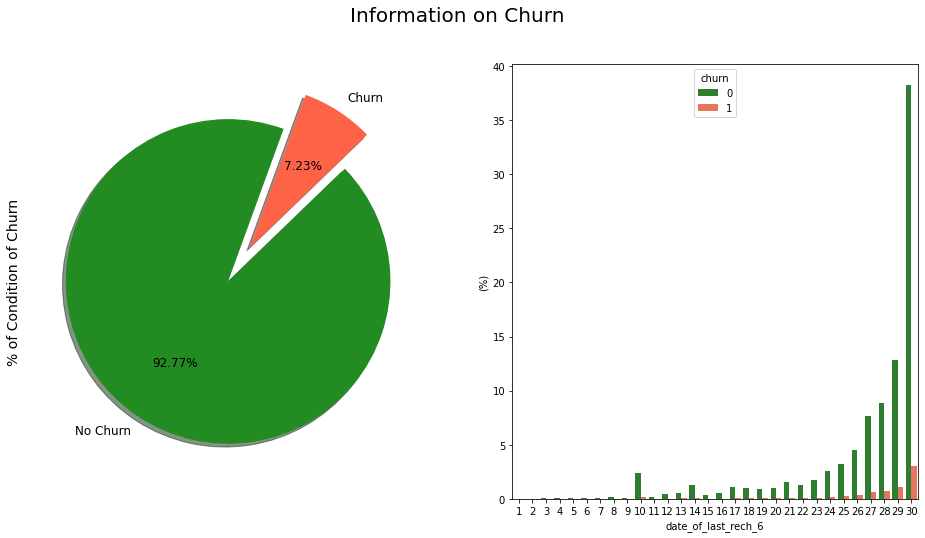

In [70]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
hvv_users["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=hvv_users, palette=palette, estimator=lambda x: len(x) / len(hvv_users) * 100)
ax[1].set(ylabel="(%)")

**The chart above illustrates the proportion of "potential churn customers" to "non-churn customers."**

**Furthermore, it highlights that the days with the most significant impact are situated towards the end of the month.**

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='churn'>

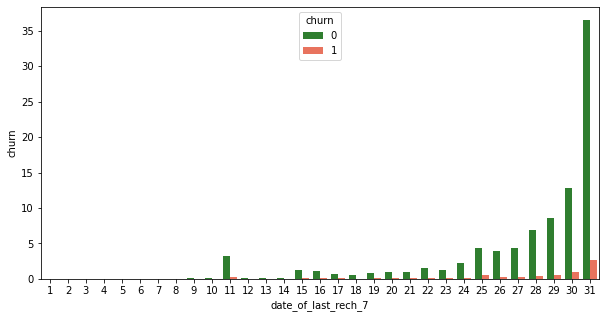

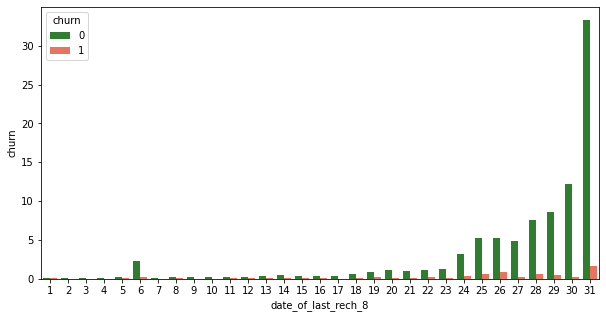

In [71]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=hvv_users, palette=palette, 
            estimator=lambda x: len(x) / len(hvv_users) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=hvv_users, palette=palette, 
            estimator=lambda x: len(x) / len(hvv_users) * 100)

**Based on the visual representation provided by the two graphs, a significant portion of recharges during the seventh and eighth months tends to occur towards the closing days of the month.**

In [72]:
hvv_users.shape

(29238, 150)

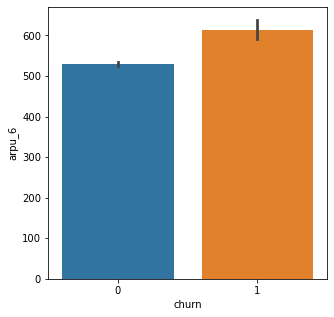

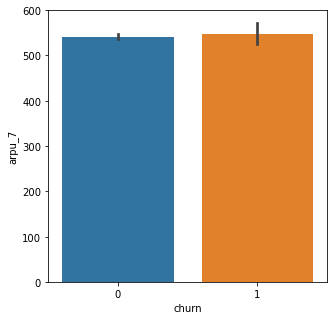

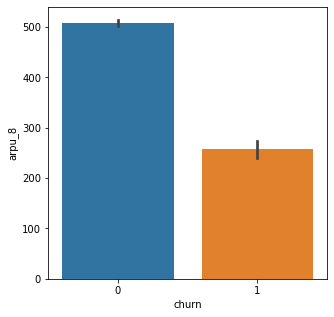

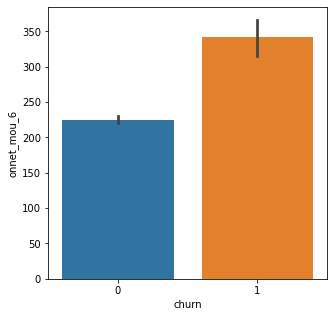

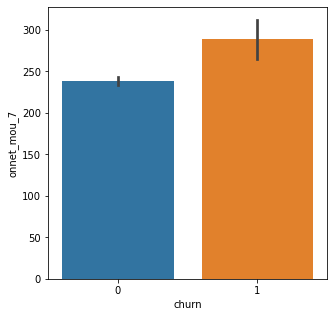

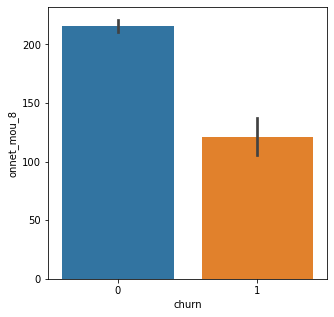

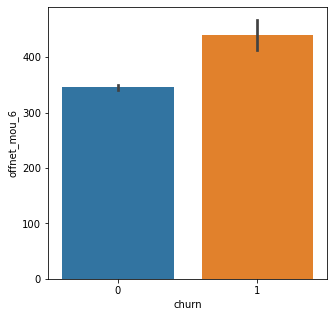

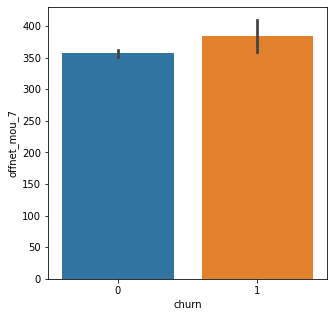

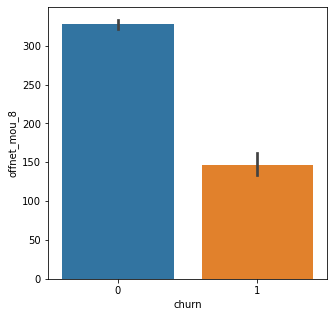

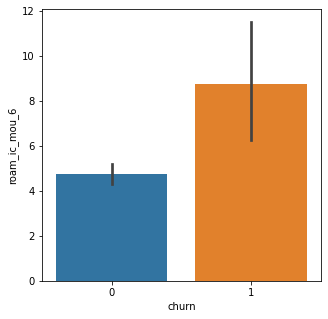

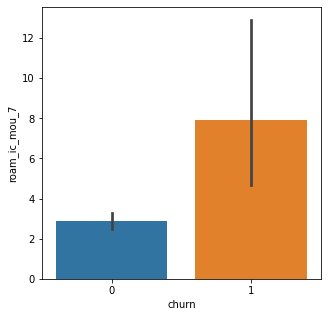

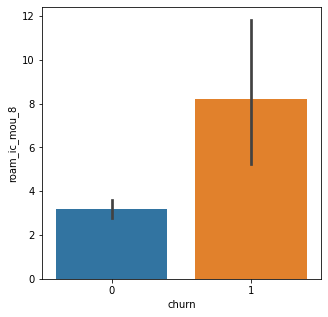

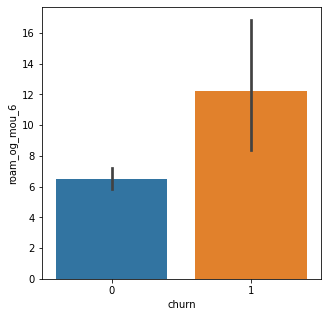

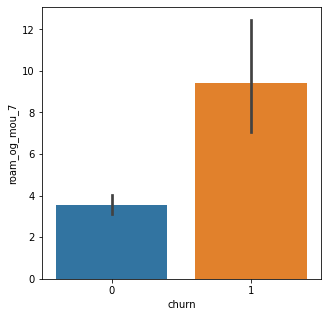

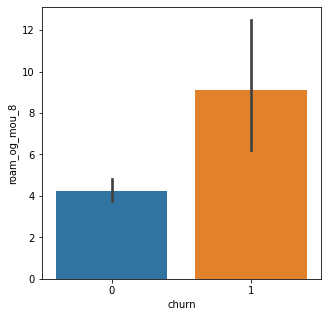

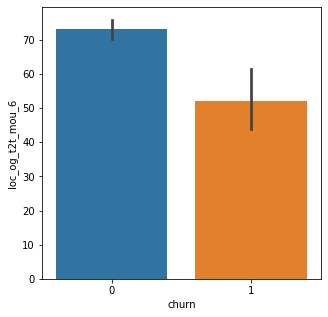

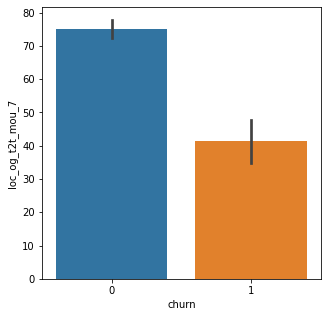

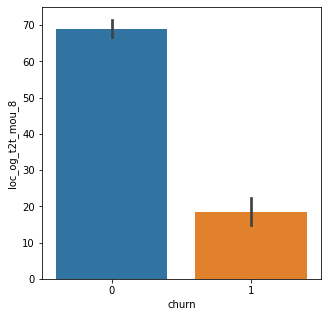

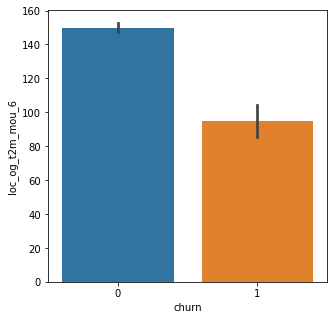

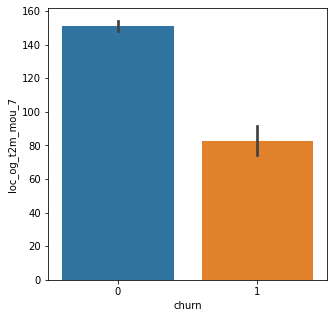

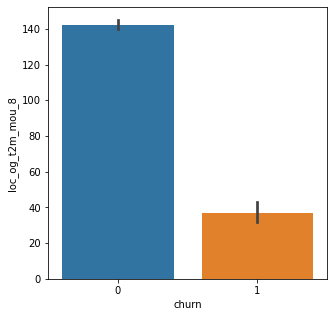

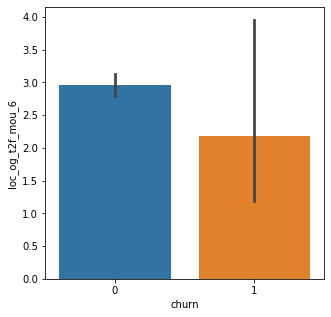

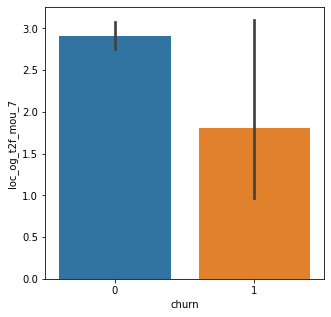

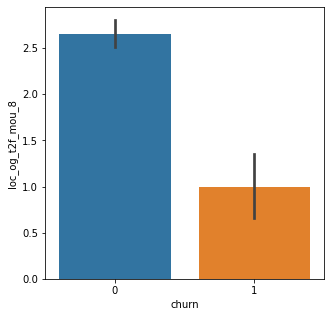

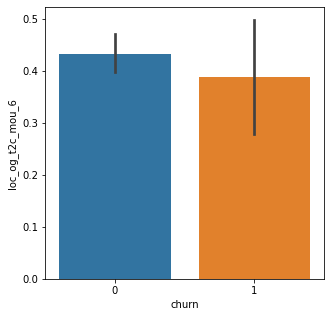

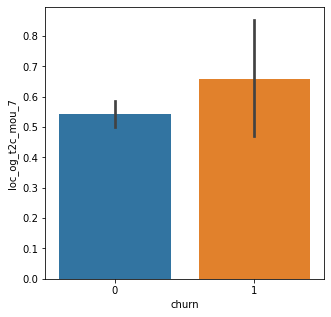

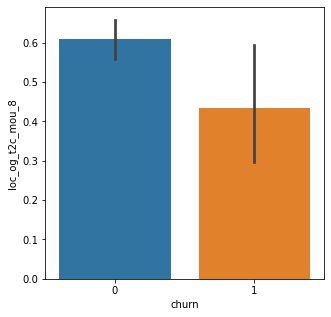

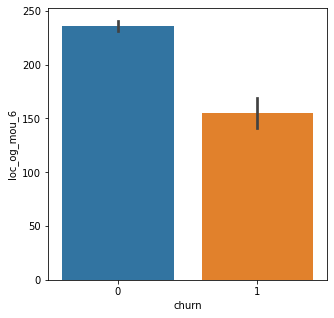

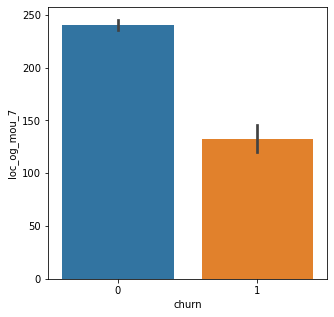

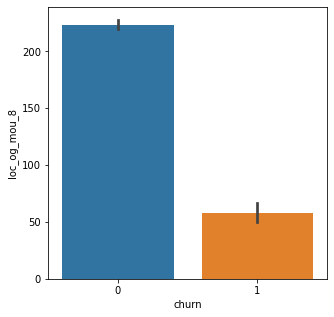

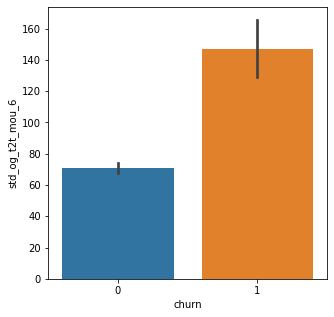

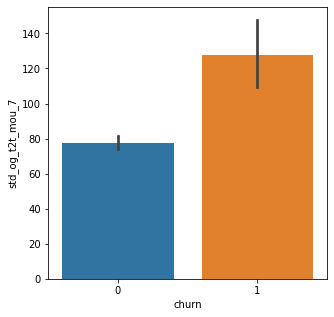

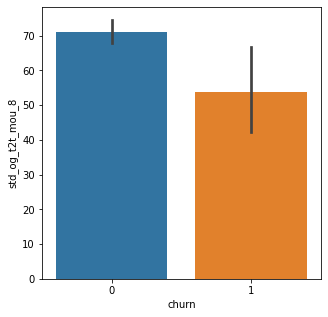

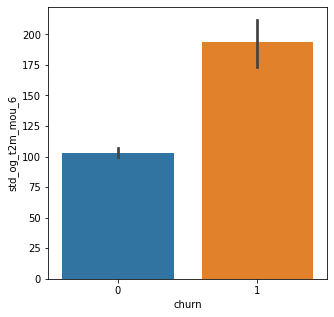

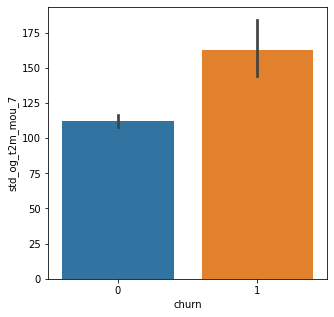

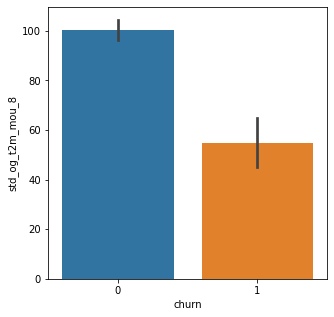

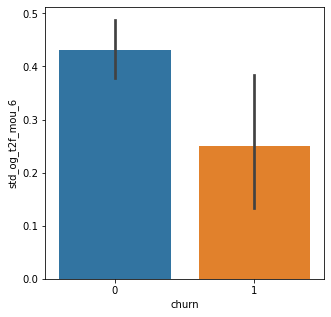

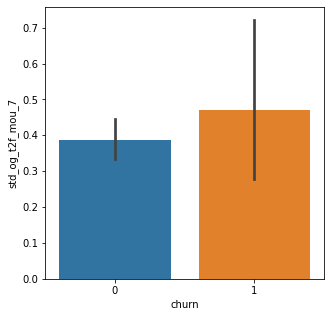

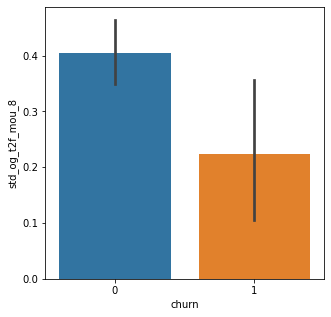

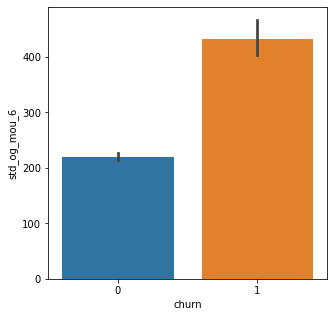

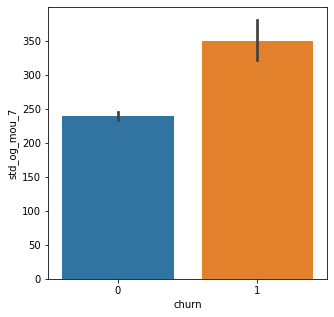

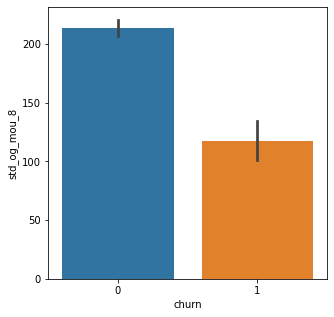

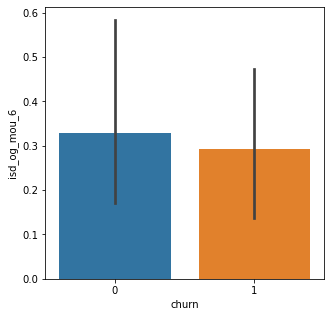

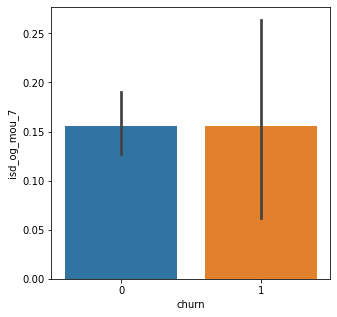

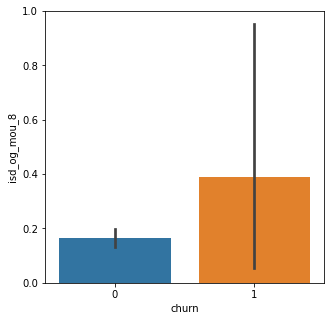

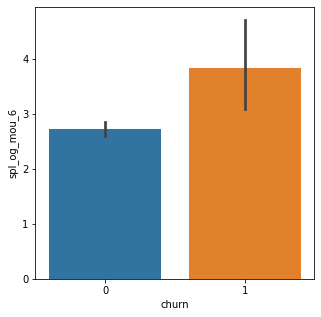

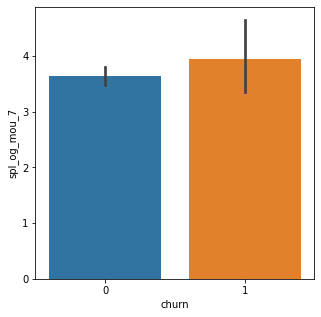

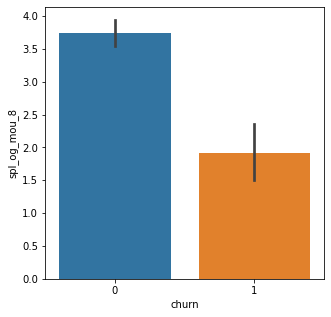

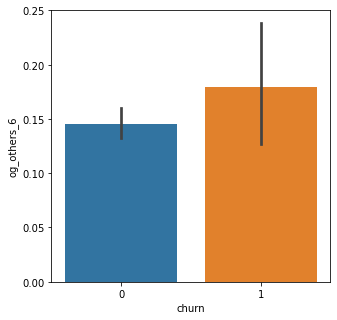

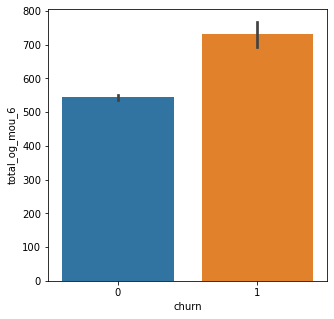

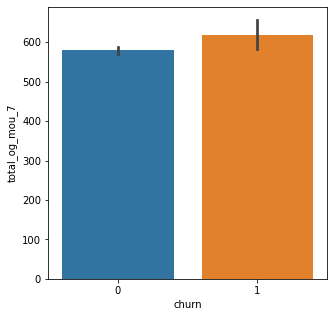

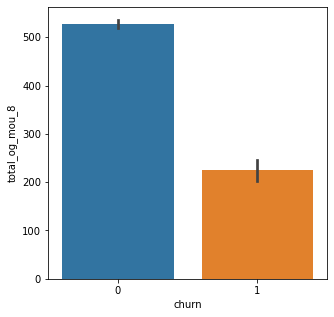

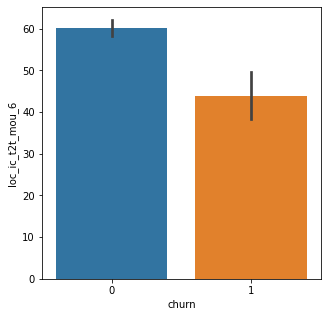

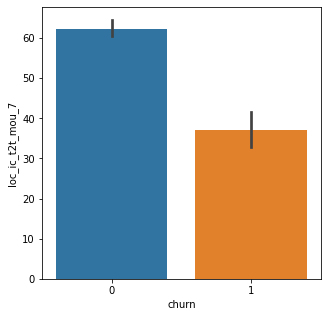

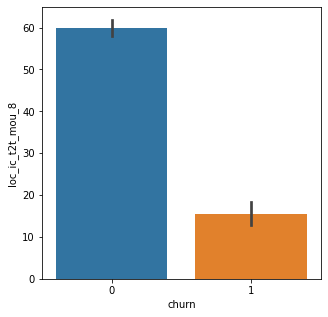

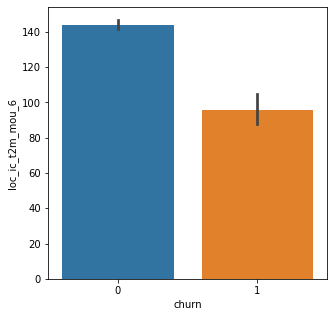

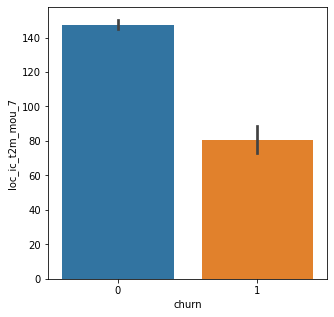

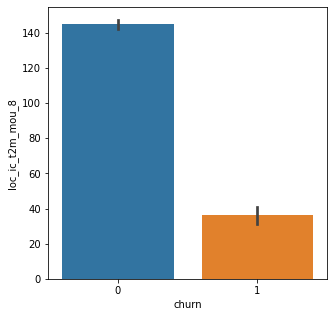

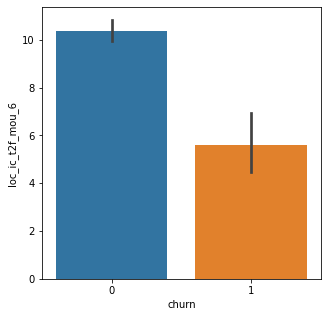

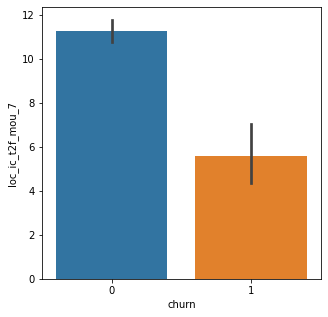

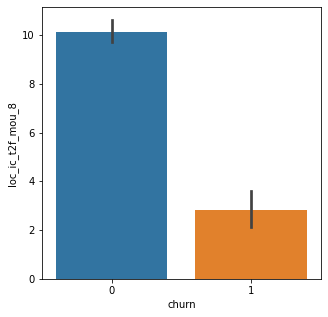

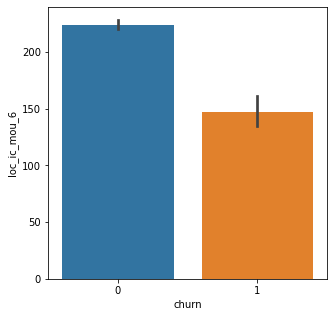

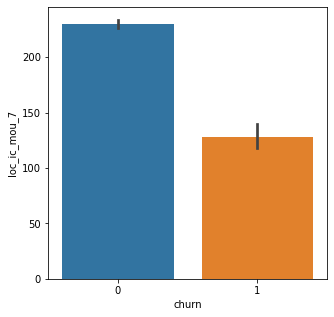

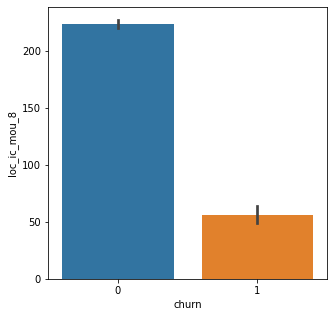

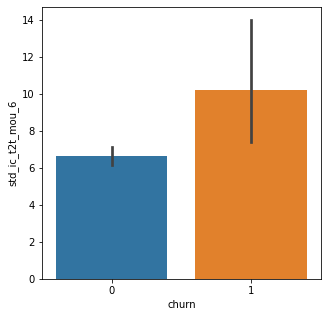

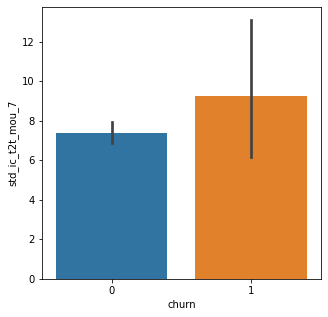

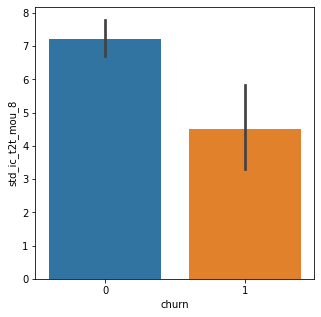

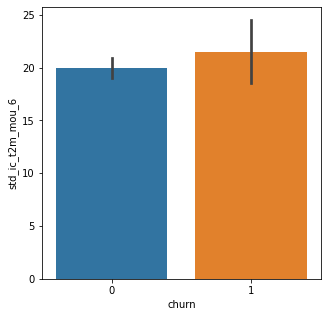

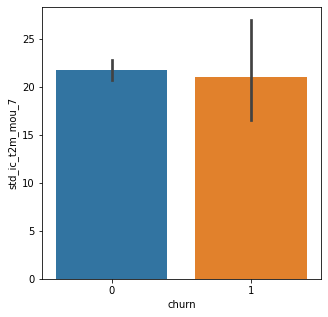

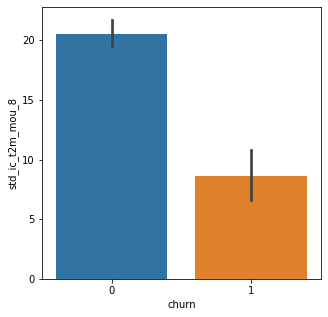

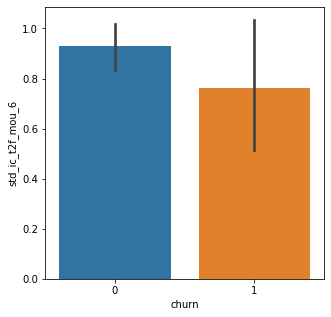

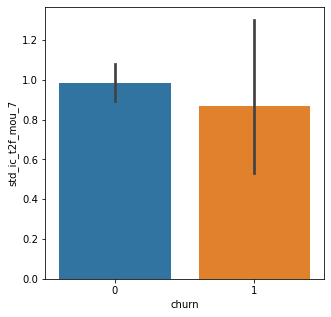

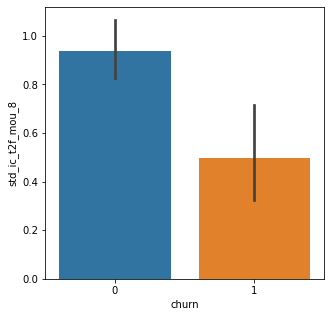

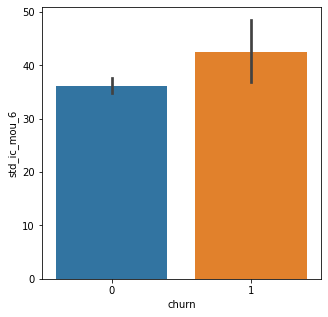

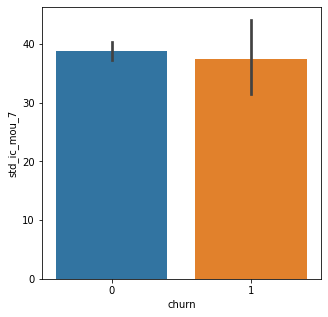

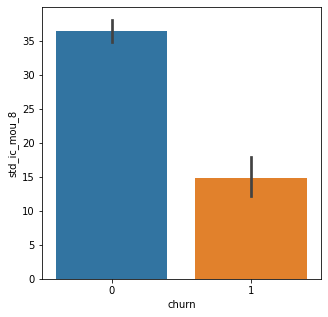

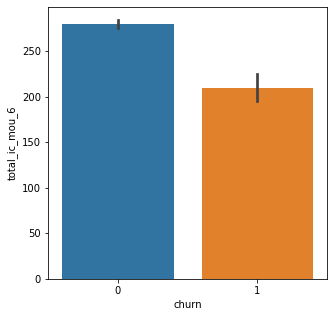

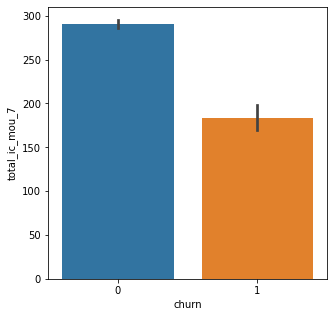

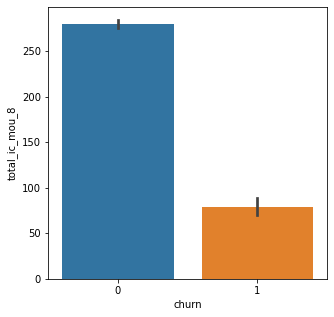

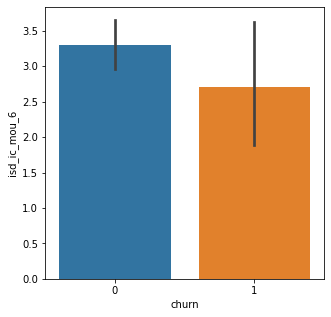

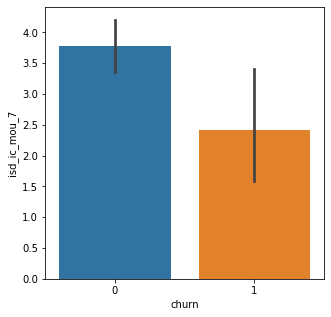

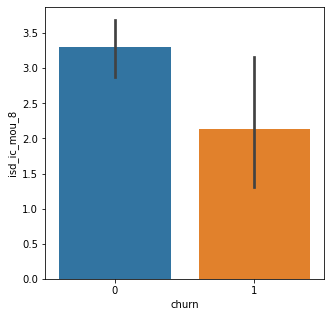

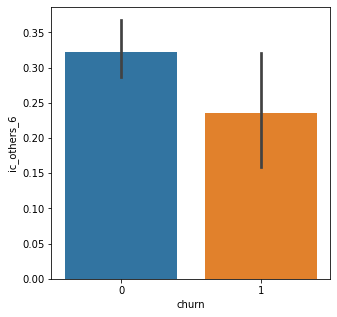

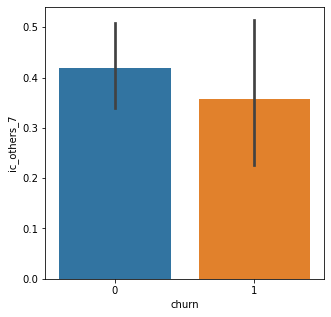

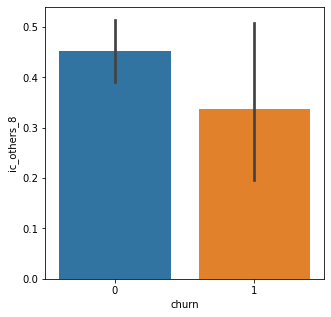

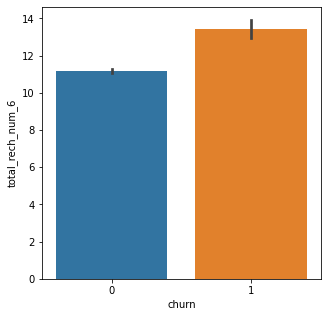

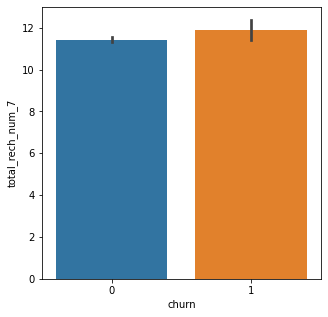

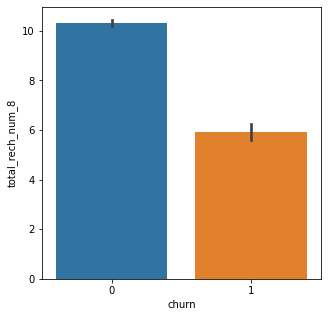

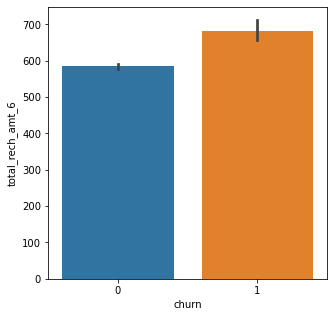

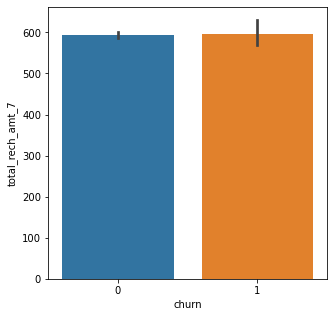

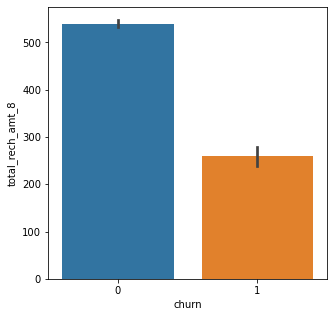

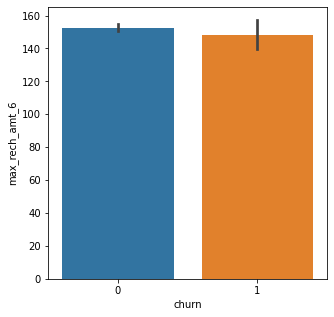

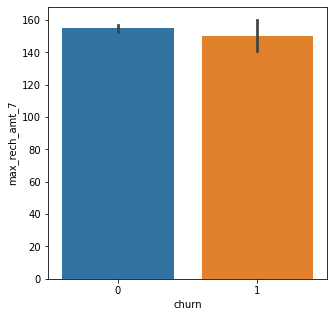

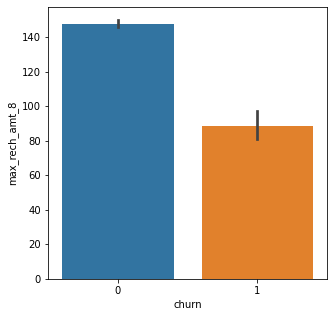

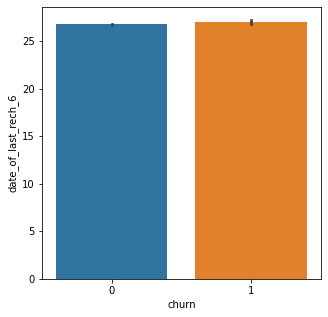

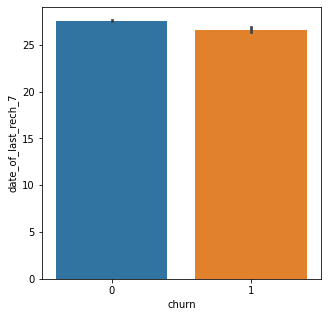

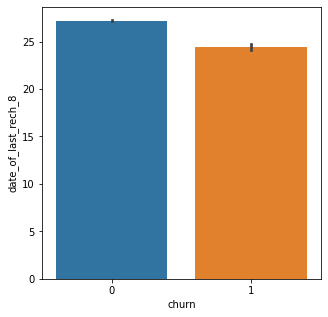

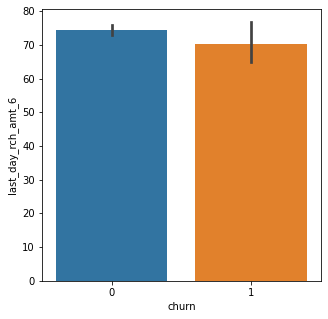

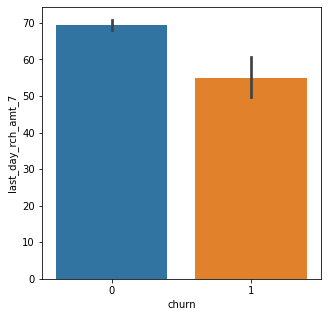

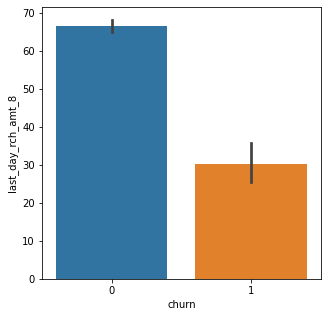

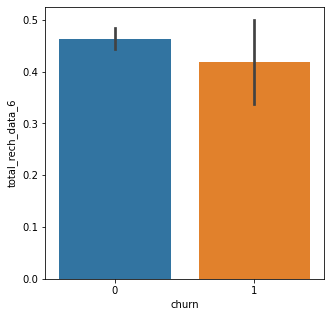

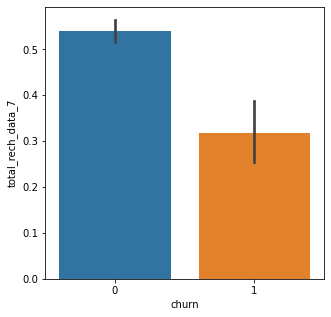

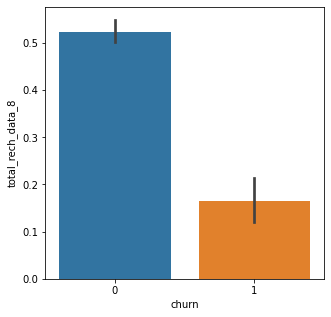

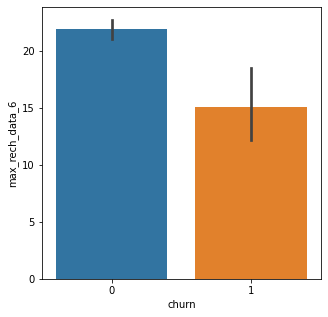

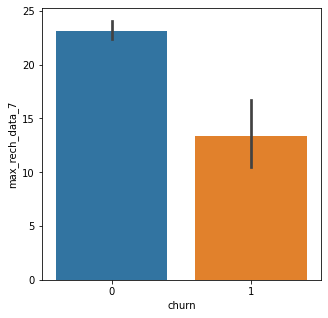

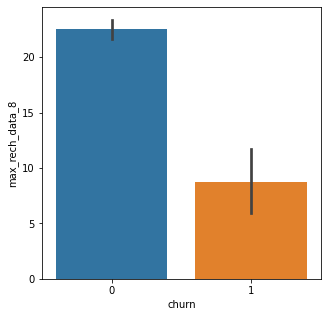

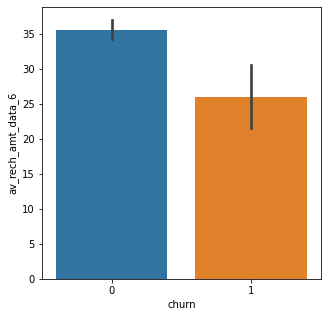

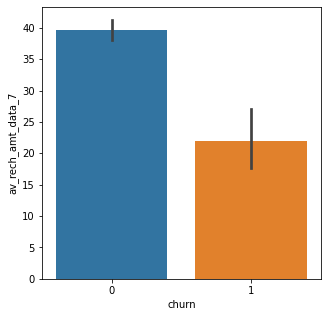

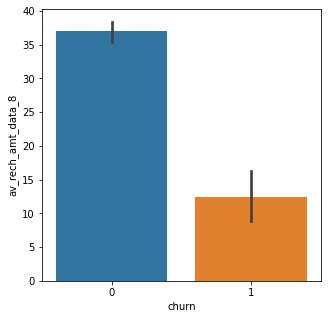

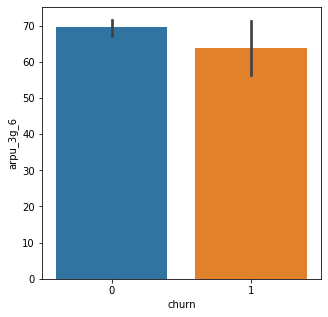

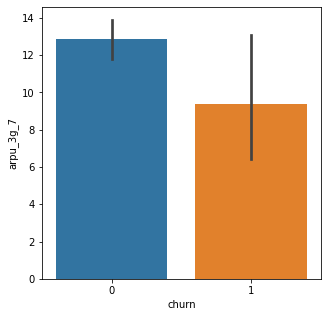

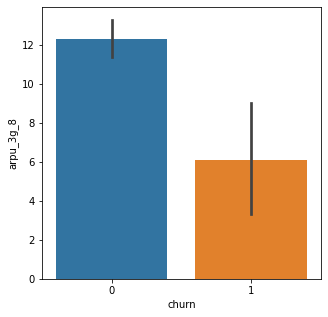

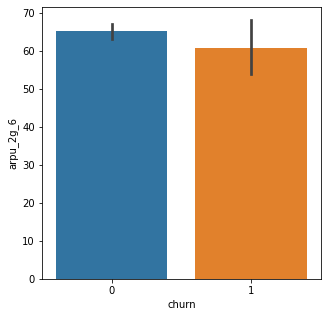

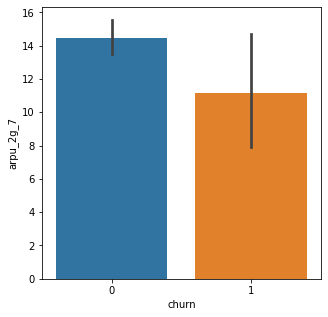

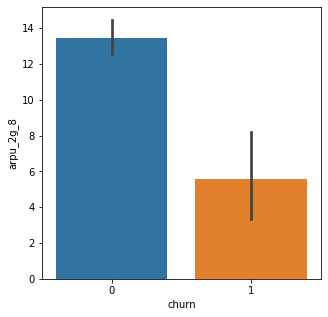

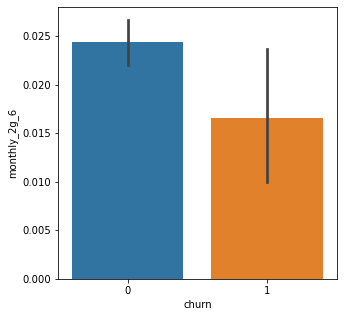

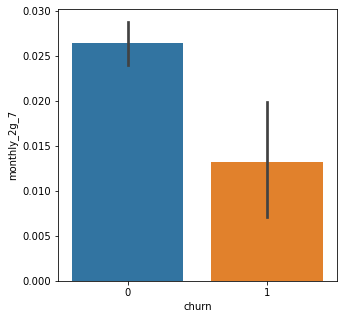

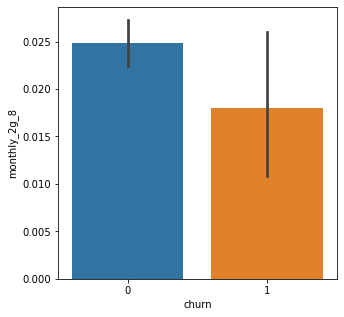

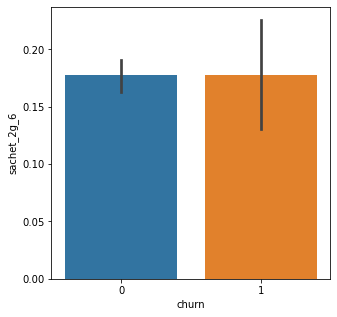

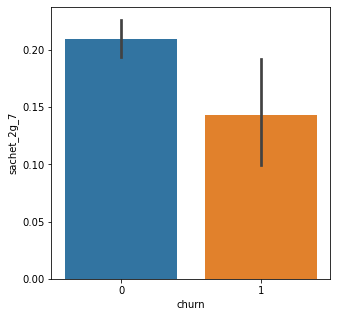

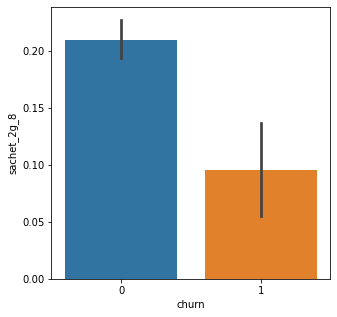

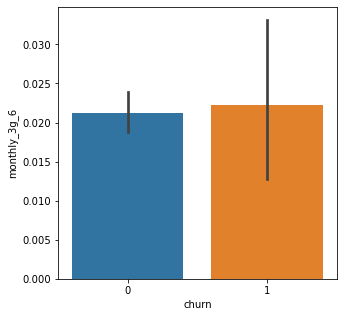

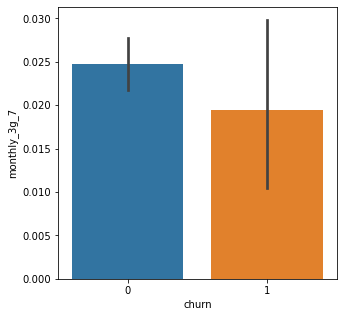

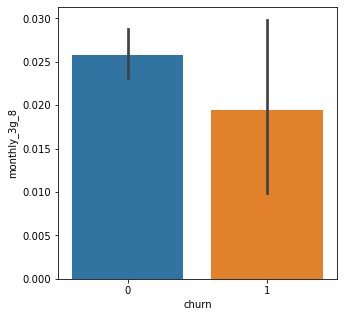

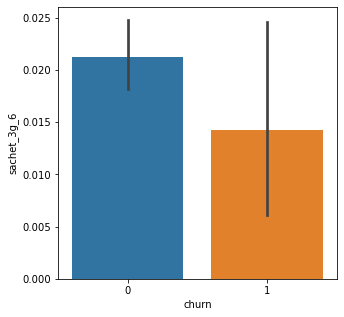

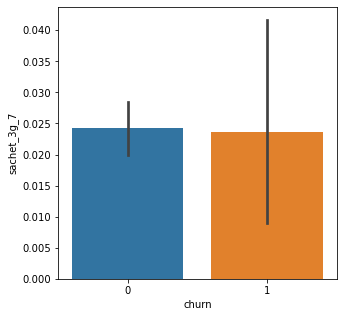

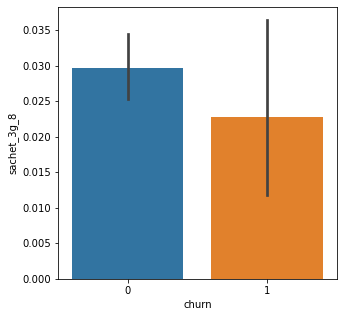

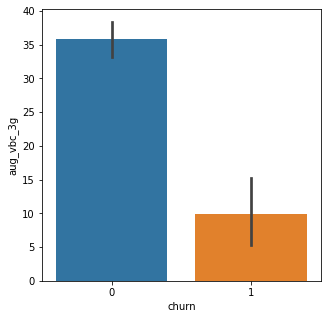

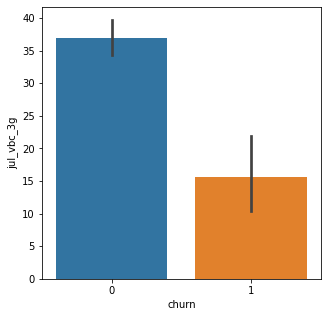

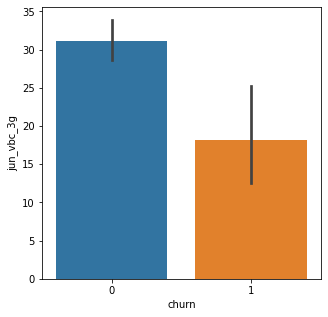

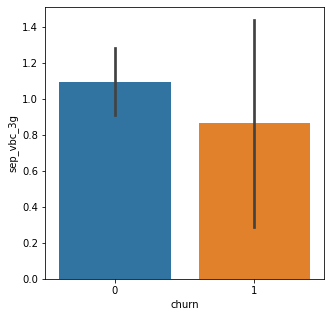

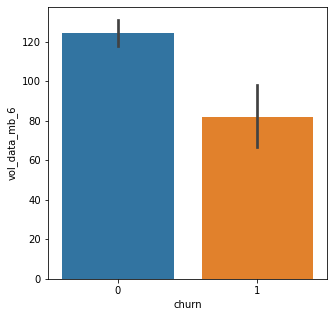

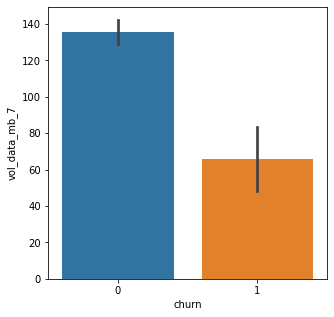

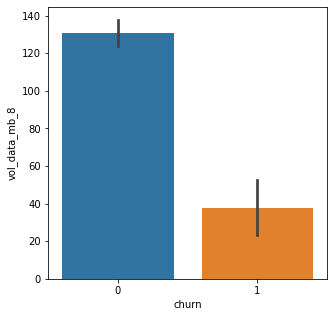

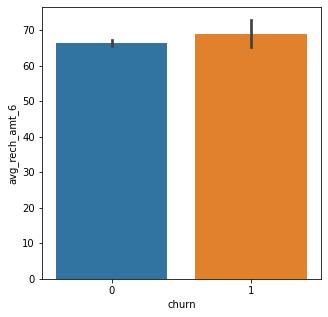

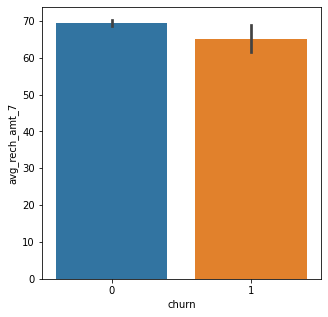

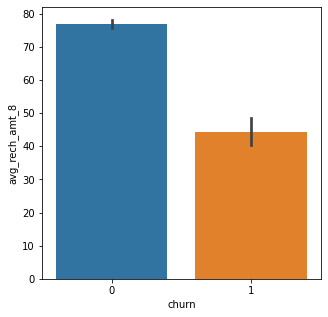

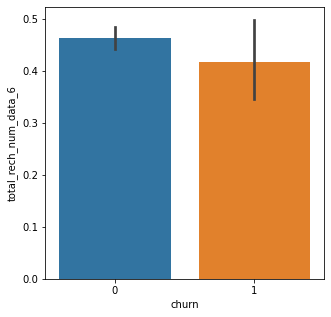

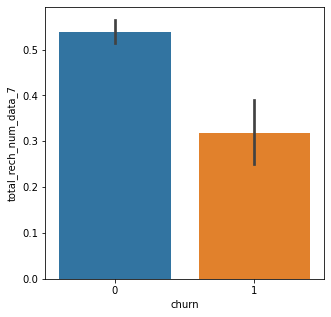

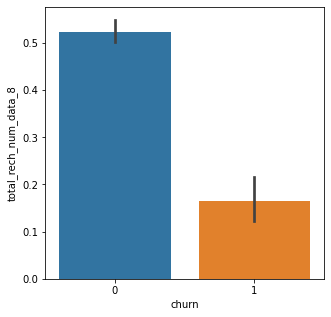

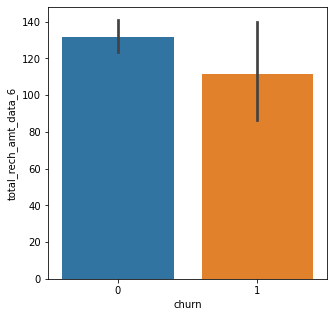

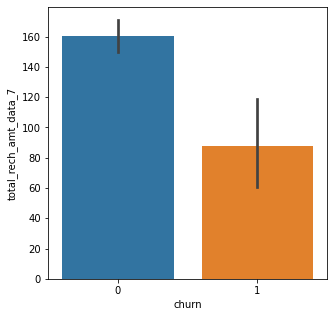

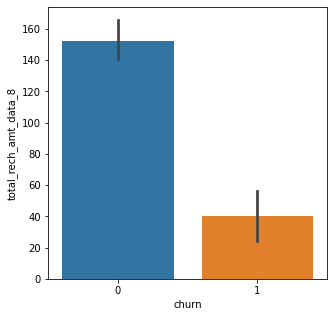

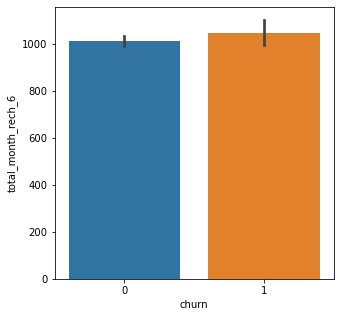

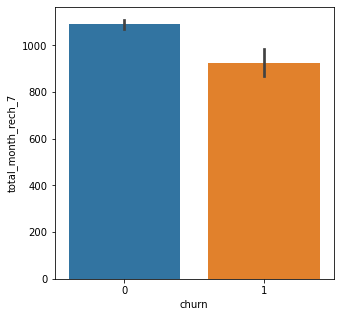

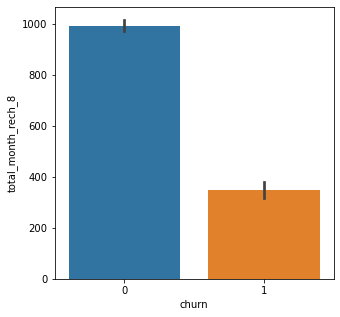

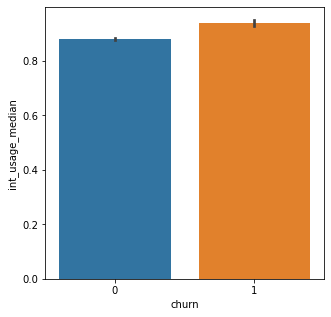

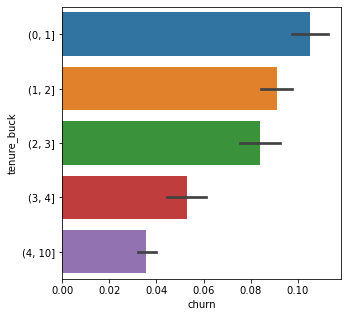

In [73]:
cont_cols = [col for col in hvv_users.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=hvv_users)
    plt.show()

**The presented graph illustrates the statistical association between "churn" and each of the other predictor variables.**

**Moreover, it indicates that the days with the most notable impact are situated towards the conclusion of the month.**

In [74]:
hvv_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 150 entries, mobile_number to tenure_buck
dtypes: category(1), float64(118), int32(3), int64(28)
memory usage: 34.2 MB


In [75]:
#dumy variabl for tenure_buck

hvv_users = pd.get_dummies(hvv_users, drop_first=True)
hvv_users.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                  "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

## Model Building

- Division of data into training and testing sets
- Standardizing values
- Constructing the model

In [76]:
#copy of the final highv_user dataframe
df = hvv_users.copy()
# removin column that s nt required for modeling
df.drop(['mobile_number'], axis=1, inplace=True)

In [77]:
from sklearn.model_selection import train_test_split

# variables in X
X = df.drop(['churn'], axis=1)

#putting response variables in Y
y = df['churn']    

# data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [78]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20466, 151)
Number transactions y_train dataset:  (20466,)
Number transactions X_test dataset:  (8772, 151)
Number transactions y_test dataset:  (8772,)


In [79]:
#features bfr PCA as it is sensitiv to the scales of the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
# fittng transformng the scaler on train
X_train = scaler.fit_transform(X_train)
#transformng train use the already fit scaler
X_test = scaler.transform(X_test)

### Addressing Class Imbalance

In [81]:
print("Before handling the imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Before handling the imbalance, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before handling the imbalance, counts of label '1': 1483
Before handling the imbalance, counts of label '0': 18983 

Before handling the imbalance, churn event rate : 7.25% 



#### As evident from the given example, there exists a notable imbalance in the data, necessitating resolution before employing PCA to enhance the model.

In [82]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [83]:
print('After handling the imbalance, the shape of train_X: {}'.format(X_train_res.shape))
print('After handling the imbalance, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After handling the imbalance, counts of label '1': {}".format(sum(y_train_res==1)))
print("After handling the imbalance, counts of label '0': {}".format(sum(y_train_res==0)))
print("After handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After handling the imbalance, the shape of train_X: (37966, 151)
After handling the imbalance, the shape of train_y: (37966,) 

After handling the imbalance, counts of label '1': 18983
After handling the imbalance, counts of label '0': 18983
After handling the imbalance, churn event rate : 50.0% 



In [84]:
#Improting PCA modul
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [85]:
#PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [86]:
pca.explained_variance_ratio_[:50]

array([0.0828115 , 0.0698877 , 0.05404438, 0.03767222, 0.03001071,
       0.02892705, 0.0282031 , 0.02565048, 0.02367346, 0.02197515,
       0.01812511, 0.01702976, 0.01657724, 0.0162258 , 0.01555039,
       0.01390396, 0.01301349, 0.01292724, 0.01267095, 0.01187883,
       0.01184292, 0.011593  , 0.01105858, 0.01050276, 0.01017117,
       0.0100365 , 0.0091925 , 0.00898403, 0.00890183, 0.00849348,
       0.00843543, 0.00816017, 0.0079358 , 0.00788559, 0.00785633,
       0.00739962, 0.00722887, 0.0071293 , 0.00711582, 0.00704183,
       0.00695625, 0.00691386, 0.00686831, 0.00674727, 0.00647   ,
       0.00646497, 0.00642391, 0.00606122, 0.00600318, 0.00577717])

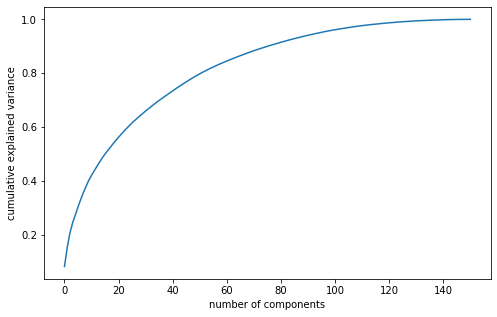

In [87]:
#plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**From the findings, it is clear that utilizing 80 components can capture 90% of the variance.**

In [88]:
#Utilizing Incremental PCA for efficiency – a particularly advantageous approach for time savings, especially when dealing with larger datasets.
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [89]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(37966, 80)

In [95]:
##Creating a correlation matrix for the principal components
cormat = np.corrcoef(X_train_pca.transpose())
##-0s in diagonals)
cormat_nodiag = cormat - np.diagflat(cormat.diagonal())
print("max corr:",cormat_nodiag.max(), ", min corr: ", cormat_nodiag.min())
#correlations is remarkably close to 0.

max corr: 0.03270483143706059 , min corr:  -0.019813654246645045


**OBSERVATON:** It's evident that there is minimal correlation between the two components. The data has been effectively cleansed of multicollinearity, enhancing the reliability of our models considerably.

In [96]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8772, 80)

## We will train a variety of models to predict customer turnover and select the most effective one. The models to be trained include:

1. Logistic Regression with PCA
2. Random Forest with PCA

#Logistic Regression

Let's implement Logistic Regression on our PCA components.

In [97]:
##Training the model on the training data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train_res)

In [98]:
#\ prediction test data


pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.81'

In [99]:
#Making predition on the test data
pred_test = model_pca.predict_proba(X_test_pca)
y_pred_default = model_pca.predict(X_test_pca)

In [100]:
# Import classification report \ confusion matrix frm sklearn metric
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [101]:
# print(classifcationreport(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6097 2045]
 [ 158  472]]
0.748860009119927


In [102]:
# Converting y_pred to dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting tocolum dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

#Excluding the index for both dataframes to concatenate them horizontally.
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Concatenating y_test_df and y_pred_1 to combine them.
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [103]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8056039037247585


## Let's plot ROC curve

In [104]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

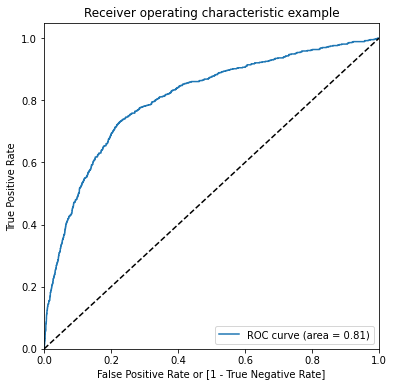

(array([0.00000000e+00, 1.22819946e-04, 1.22819946e-04, ...,
        9.99754360e-01, 9.99877180e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0015873, ..., 1.       , 1.       ,
        1.       ]),
 array([           inf, 9.99129775e-01, 9.98438424e-01, ...,
        1.20964468e-09, 1.82370575e-12, 1.22525795e-27]))

In [105]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [106]:
# Creating columns with various probability cutoffs.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.567305,1,1,1,1,1,1,0,0,0,0
1,0,0.067814,1,0,0,0,0,0,0,0,0,0
2,0,0.609809,1,1,1,1,1,1,1,0,0,0
3,0,0.060223,1,0,0,0,0,0,0,0,0,0
4,0,0.029076,1,0,0,0,0,0,0,0,0,0


#Calculating accuracy, sensitivity, and specificity for different probability cutoffs.

In [107]:
# Now, we will calculate accuracy, sensitivity, and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.071819  0.000000  1.000000
0.1   0.1  0.340971  0.294891  0.936508
0.2   0.2  0.474350  0.441415  0.900000
0.3   0.3  0.580255  0.558585  0.860317
0.4   0.4  0.668947  0.658315  0.806349
0.5   0.5  0.748860  0.748833  0.749206
0.6   0.6  0.815435  0.829157  0.638095
0.7   0.7  0.869129  0.897937  0.496825
0.8   0.8  0.905267  0.949767  0.330159
0.9   0.9  0.926585  0.987104  0.144444


<AxesSubplot:xlabel='prob'>

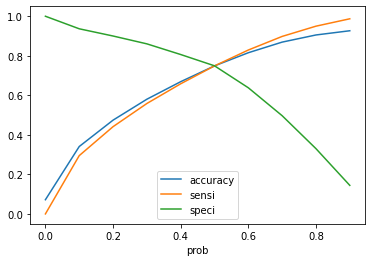

In [108]:
#Plotting accuracy, sensitivity, and specificity for different probability cutoffs.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [109]:
## Determining the optimal cutoff.

import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [110]:
# Generating a new column labeled 'predicted' with a value of 1 if Churn_Prob > 0.49; otherwise, assigning it a value of 0.
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8142
1     630
Name: churn, dtype: int64

### Confuson Matrix

In [111]:
# Confuson matrx 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6022, 2120],
       [ 154,  476]], dtype=int64)

### Performance Metrics for the Logistic Regression Model on PCA

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.748860009119927
Sensitivity:  0.7555555555555555
Specificity:  0.7396217145664455
false postive rate:  0.2603782854335544
positive predictive value:  0.18335901386748846
Negative predictive value:  0.9750647668393783
Misclassification Rate:  0.259233926128591


# Random Forest with PCA

In [113]:
#Imprting random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_pca,y_train_res)

#  predictions
y_pred_default = rfc.predict(X_test_pca)

In [114]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7744,  398],
       [ 451,  179]], dtype=int64)

In [115]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
# Examining the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# calculate specificity
print('Specificity: ',TN / float(TN+FP))

# false postive ratepredicting churn when customer does bt hav churne
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclasification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.2841269841269841
Specificity:  0.951117661508229
false postive rate:  0.048882338491771066
positive predictive value:  0.31022530329289427
Negative predictive value:  0.9449664429530201
Misclassification Rate:  0.09678522571819426


## Tuning Hyperparameters for RandomForest

In [122]:
##Performing Hyperparameter Tuning
# #Utilizing GridSearchCV to determine the optimal value for n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify the number of folds for k-fold Cross-Validation.
n_folds = 5
# Defining the parameters for building the model.
parameters = {'max_depth': range(1, 21, 5)}

# Creating an instance of the model.
rf_with_pca = RandomForestClassifier()


# Fit the decision tree on the training data.
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, scoring="accuracy", n_jobs=1, return_train_score=True )
rf_with_pca.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': range(1, 21, 5)}, return_train_score=True,
             scoring='accuracy')

In [123]:
# Considering rf_with_pca as a GridSearchCV object

# Access the cv_results_ attribute following the fitting process
scores = rf_with_pca.cv_results_

#  reframe it to avoid palgarism
import pandas as pd
df_scores = pd.DataFrame(scores)

# Show the initial rows of the DataFrame...
df_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.644854,1.823976,0.088807,0.023897,1,{'max_depth': 1},0.727285,0.730146,0.740682,0.738048,...,0.732945,0.005384,4,0.738015,0.739604,0.735686,0.734073,0.719191,0.733314,0.007312
1,40.273187,1.029720,0.118387,0.021986,6,{'max_depth': 6},0.797998,0.800738,0.805479,0.806401,...,0.804272,0.004467,3,0.821908,0.821223,0.817601,0.818358,0.815988,0.819016,0.002229
2,67.820307,1.226485,0.129489,0.017323,11,{'max_depth': 11},0.903081,0.902015,0.895298,0.901883,...,0.902571,0.004858,2,0.948044,0.946597,0.947190,0.948672,0.947651,0.947631,0.000709
3,87.474358,5.834805,0.153170,0.009894,16,{'max_depth': 16},0.939953,0.941130,0.934677,0.935335,...,0.939340,0.004016,1,0.987028,0.987785,0.987884,0.987785,0.987423,0.987581,0.000318


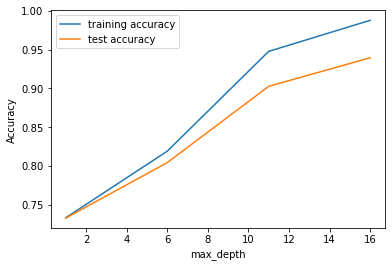

In [124]:
# Plotting accuracies with respect to max_depth...
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
# Adjusting the number of estimators (n_estimators)...
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#k-foldCV
n_folds = 5

# Defining the parameters for constructing the model.
parameters = {'n_estimators': range(50, 250, 50)}

# Instantiating the model with a specified max_depth...
rf = RandomForestClassifier(max_depth=11)


# Fit the decision tree on the training data.
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=1, return_train_score=True )
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=11), n_jobs=1,
             param_grid={'n_estimators': range(50, 250, 50)},
             return_train_score=True, scoring='accuracy')

In [126]:
# Scores obtained from GridSearchCV...
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.874302,0.583613,0.054854,0.002345,50,{'n_estimators': 50},0.898736,0.895430,0.896352,0.901620,...,0.899910,0.004321,4,0.945344,0.942679,0.945050,0.948573,0.945478,0.945425,0.001876
1,61.392955,0.910147,0.116188,0.011580,100,{'n_estimators': 100},0.902423,0.900566,0.894903,0.899118,...,0.901675,0.005442,3,0.945674,0.947124,0.947914,0.948178,0.947815,0.947341,0.000903
2,95.952814,6.065841,0.163964,0.015785,150,{'n_estimators': 150},0.905583,0.902147,0.898064,0.900171,...,0.903598,0.004887,2,0.948769,0.946696,0.948573,0.949198,0.948441,0.948335,0.000859
3,121.778028,0.654100,0.205711,0.001750,200,{'n_estimators': 200},0.906637,0.904254,0.895825,0.903332,...,0.904335,0.005137,1,0.947781,0.946663,0.948573,0.949528,0.947947,0.948098,0.000944


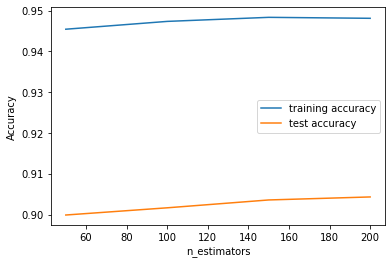

In [127]:
# Plotting accuracies with respect to n_estimators...
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [128]:
# Utilizing GridSearchCV to identify the optimal value for max_features...
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify the number of folds for k-fold Cross-Validation.
n_folds = 5

# Defining the parameters for constructing the model.
parameters = {'max_features': [4, 8, 14, 20]}

# Creating an instance of the model.
rf = RandomForestClassifier(max_depth=10)


# Fit the decision tree on the training data.
rf = GridSearchCV(rf, parameters, cv=n_folds,  scoring="accuracy", n_jobs=1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=1,
             param_grid={'max_features': [4, 8, 14, 20]},
             return_train_score=True, scoring='accuracy')

In [129]:
# Scores obtained from GridSearchCV...
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.169663,0.789993,0.099909,0.005586,4,{'max_features': 4},0.877140,0.875543,0.877519,0.880153,...,0.879550,0.004193,4,0.919729,0.918085,0.923090,0.918974,0.917888,0.919553,0.001887
1,56.208301,0.274284,0.097252,0.002530,8,{'max_features': 8},0.885304,0.885157,0.879626,0.885157,...,0.885977,0.004841,3,0.927170,0.926810,0.925987,0.929444,0.927370,0.927356,0.001146
2,99.584797,2.220589,0.104510,0.002185,14,{'max_features': 14},0.889913,0.889635,0.883840,0.886211,...,0.888953,0.003838,2,0.933228,0.933164,0.933592,0.933033,0.932572,0.933118,0.000330
3,140.605917,1.027574,0.115211,0.029112,20,{'max_features': 20},0.890308,0.888186,0.884367,0.888186,...,0.889743,0.004402,1,0.934710,0.932605,0.936753,0.935864,0.933362,0.934659,0.001533


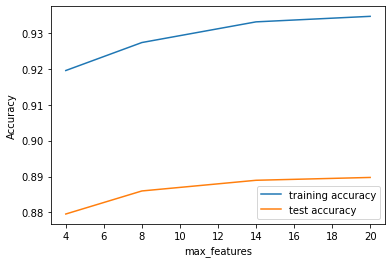

In [130]:
# Plotting accuracies with respect to max_features...
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
# Utilizing GridSearchCV to determine the optimal value for min_samples_leaf...
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Specify the number of folds for k-fold Cross-Validation.
n_folds = 5

# Defining the parameters for constructing the model.
parameters = {'min_samples_leaf': range(100, 250, 50)}

# Creating an instance of the model.
rf = RandomForestClassifier()


# Fit the decision tree on the training data.
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'min_samples_leaf': range(100, 250, 50)},
             return_train_score=True, scoring='accuracy')

In [132]:
# score af Grid Search CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,47.773643,1.759182,0.100354,0.006743,100,{'min_samples_leaf': 100},0.805504,0.816937,0.823390,0.821151,...,0.819444,0.008193,1,0.842091,0.837125,0.838442,0.838903,0.836664,0.838645,0.001909
1,42.927361,0.843508,0.092512,0.006533,150,{'min_samples_leaf': 150},0.797998,0.804952,0.807718,0.807849,...,0.806959,0.005874,2,0.824213,0.822671,0.822935,0.822540,0.819807,0.822433,0.001441
2,39.054206,0.634531,0.084885,0.003838,200,{'min_samples_leaf': 200},0.786410,0.794943,0.801001,0.800474,...,0.798662,0.007905,3,0.813842,0.812630,0.810951,0.812695,0.810918,0.812207,0.001125


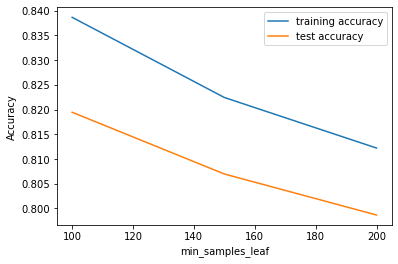

In [133]:
# Plotting accuracies with respect to min_samples_leaf.
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [134]:
# Utilizing GridSearchCV to identify the optimal value for min_samples_split...
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Specify the number of folds for k-fold Cross-Validation.
n_folds = 5

# Defining the parameters for constructing the model.
parameters = {'min_samples_split': range(150, 350, 50)}

# instantiate model
rf = RandomForestClassifier()


# Fit the decision tree on the training data.
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'min_samples_split': range(150, 350, 50)},
             return_train_score=True, scoring='accuracy')

In [135]:
# Scores obtained from GridSearchCV...
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,71.102208,1.081996,0.109223,0.002697,150,{'min_samples_split': 150},0.842244,0.852101,0.858422,0.861188,...,0.855766,0.007946,1,0.897175,0.896257,0.897508,0.896289,0.893162,0.896078,0.001538
1,66.652765,0.268911,0.103990,0.005007,200,{'min_samples_split': 200},0.829734,0.840379,0.847491,0.846174,...,0.843782,0.008452,2,0.879889,0.875778,0.875910,0.874724,0.873506,0.875961,0.002146
2,67.080518,3.260280,0.117086,0.031479,250,{'min_samples_split': 250},0.819463,0.831029,0.837218,0.832609,...,0.832930,0.008166,3,0.864118,0.862279,0.863662,0.861588,0.858756,0.862081,0.001897
3,65.694261,0.809247,0.123673,0.019227,300,{'min_samples_split': 300},0.813800,0.821941,0.826814,0.826682,...,0.824949,0.007089,4,0.851936,0.850130,0.850591,0.852171,0.847595,0.850485,0.001639


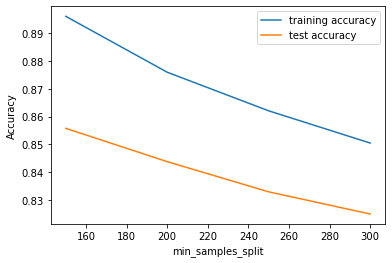

In [136]:
# Plotting accuracies with respect to min_samples_split...
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [137]:
# Formulating the parameter grid based on the outcomes of the random search...
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 300, 100),
    'n_estimators': range(200, 300, 100), 
    'max_features': [8, 10]
}
# Creating a base model...
rf = RandomForestClassifier(class_weight='balanced')

# Creating an instance of the grid search model...
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,cv = 5, n_jobs=1, verbose = 1,return_train_score=True )
grid_search.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 300, 100),
                         'n_estimators': range(200, 300, 100)},
             refit='recall_score', return_train_score=True, verbose=1)

In [138]:
# Printing the optimal accuracy score and associated hyperparameters...
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8186011567354029 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [139]:
# Model with the optimal hyperparameters...
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, max_depth=10,min_samples_leaf=100, min_samples_split=200, 
                             max_features=10, n_estimators=200)

In [140]:
####fit#
rfc.fit(X_train_pca, y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [141]:
#predct
y_pred_default = rfc.predict(X_test_pca)

In [142]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8142
           1       0.22      0.63      0.33       630

    accuracy                           0.81      8772
   macro avg       0.59      0.73      0.61      8772
weighted avg       0.91      0.81      0.85      8772

[[6719 1423]
 [ 231  399]]
accuracy_score:   0.8114455084359325


In [143]:
# Confuson Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6719, 1423],
       [ 231,  399]], dtype=int64)

### Statistical metrics for Random Forest

In [144]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Examining the sensitivity of our logistic regression model...
print('Sensitivity: ', TP / float(TP+FN))

# calculate specficity
print('Specificity: ',TN / float(TN+FP))

# Calculating the false positive rate - predicting churn when the customer has not actually churned...
print('false postive rate: ',FP/ float(TN+FP))

# positive predctive values
print('positive predictive value: ', TP / float(TP+FP))

# Negative  predctive values
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclasification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8114455084359325
Sensitivity:  0.6333333333333333
Specificity:  0.8252272169000245
false postive rate:  0.17477278309997543
positive predictive value:  0.21899012074643248
Negative predictive value:  0.9667625899280575
Misclassification Rate:  0.18855449156406748


### Model Selection Recommendation

**After conducting customer churn analysis on this specific dataset using PCA, the results indicate that Logistic Regression outperforms the Decision Tree model. Logistic Regression demonstrates higher sensitivity and a better specificity score, making it a more reliable choice for predicting potential customer attrition.**

- Logistic Regression with PCA achieves a Sensitivity of 75%, making it the superior model.
- RandomForest, in contrast, exhibits a lower sensitivity of 64%.

#### Logistic Regression with PCA 
- Accuracy Score on test data:  0.7462380300957593
- Sensitivity:  0.7507936507936508
- Specificity:  0.7377794153770573
- False Positive Rate:  0.2622205846229428
- Positive Predictive Value:  0.18136503067484663
- Negative Predictive Value:  0.9745295262816352
- Misclassification Rate:  0.2612859097127223

#### RandomForest with PCA
- Accuracy Score:   0.8111035111719106
- Sensitivity:  0.6412698412698413
- Specificity:  0.8242446573323507
- False Positive Rate:  0.17575534266764922
- Positive Predictive Value:  0.22016348773841962
- Negative Predictive Value:  0.9674210753928211
- Misclassification Rate:  0.18889648882808938

### **In conclusion, for predicting customer attrition in this scenario, the recommended model is Logistic Regression with PCA.**

# Random Forest for Churn Driver Features (utilizing balanced data)

We will apply the Random Forest model established earlier to the dataset after addressing the data imbalance. This aims to identify the key predictors influencing churn.

In [145]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

<AxesSubplot:>

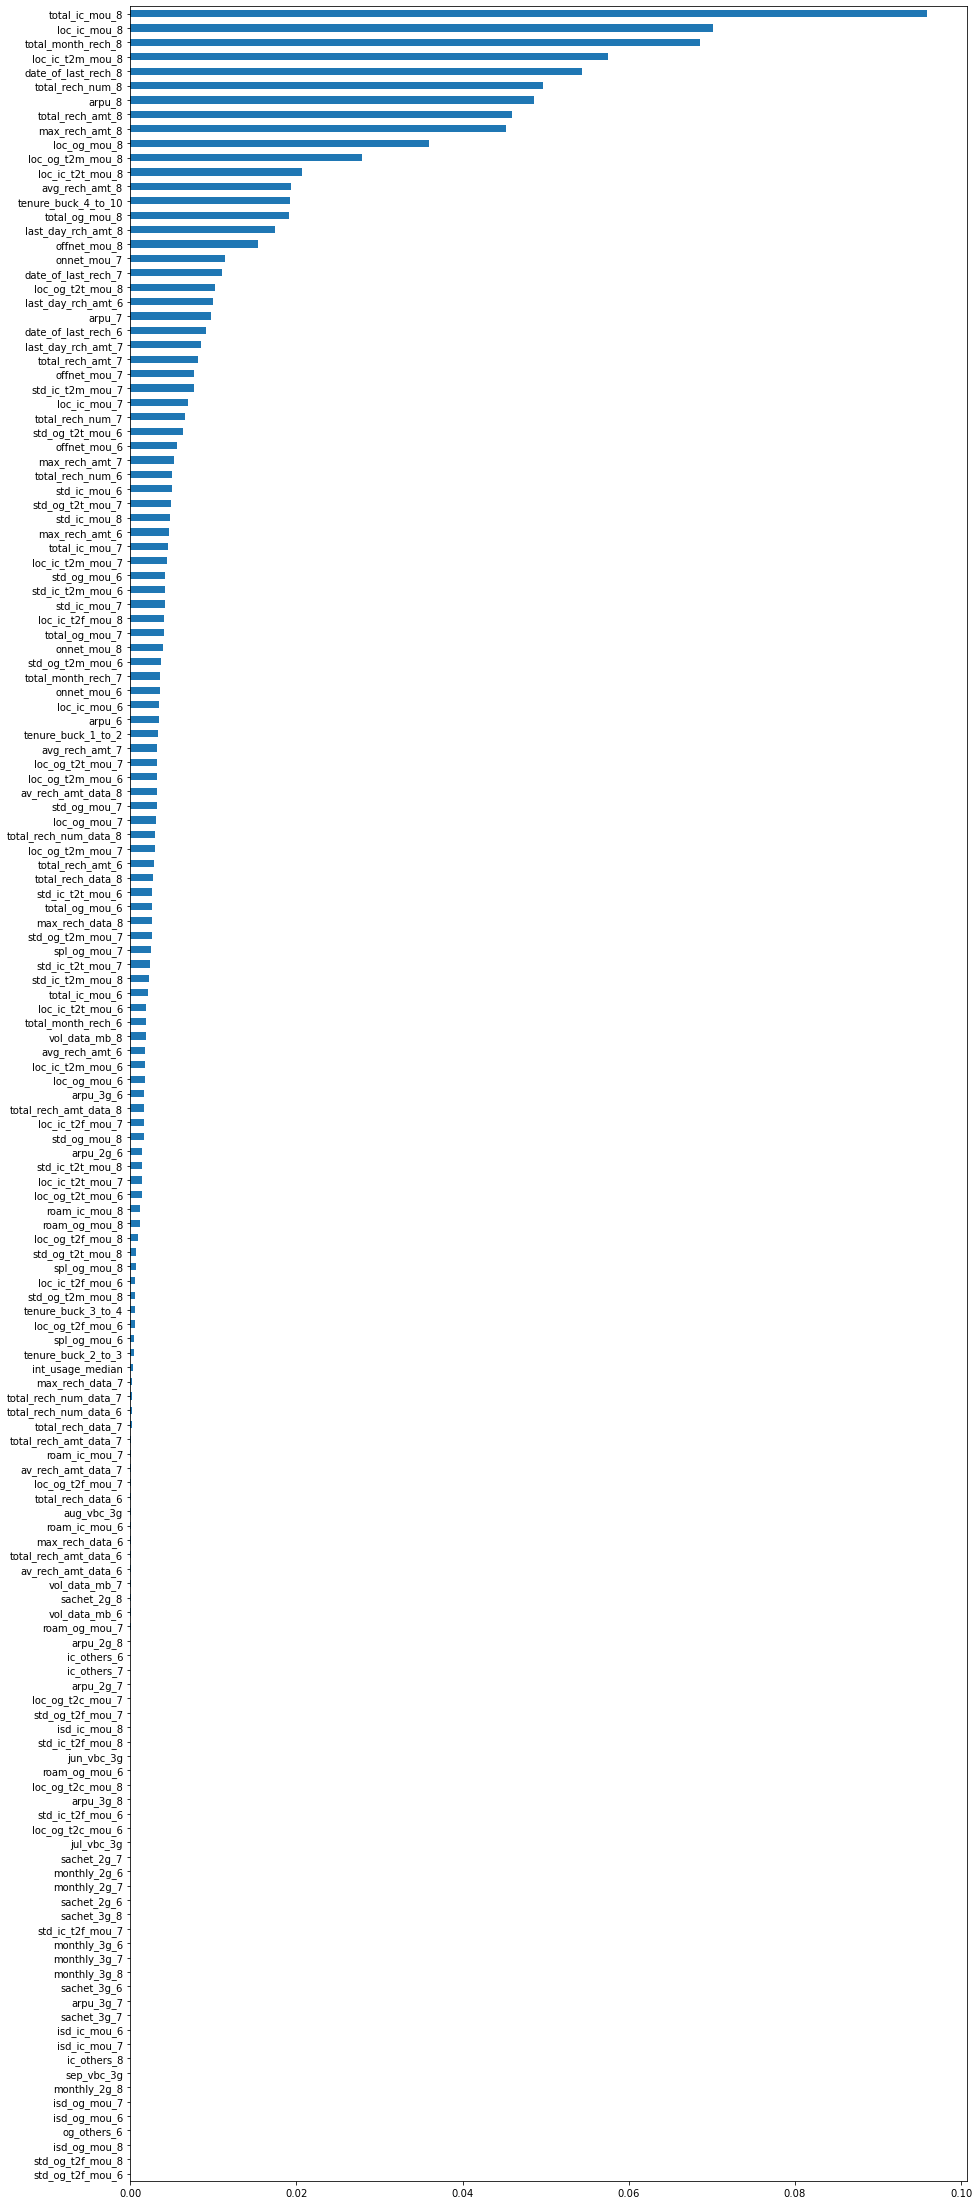

In [146]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

# Observation:

The chart above reveals that the top features are primarily associated with month 8, or the action month, as identified by our RandomForest implementation.

Therefore, it's evident that the activities during the action phase have a direct impact on the loss of high-value clients. The key characteristics include:



1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**date_of_last_rech_8**	-- *Last date of recharge in the month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
7.	**arpu_8**				-- *average revenue per user in month 8*
8.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
9.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
10.	**total_rech_amt_8**	-- *total recharge amount in month 8*
11.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
12.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
13.	**tenure_buck_4_to_10**		-- *tenure of the customer using the operator T network*
14.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
15.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
16.     **offnet_mou_8**        -- *All kind of voice calls(minutes of usage) outside the operator T network in month 8*
17.	**date_of_last_rech_7**	-- *Last date of recharge in the month 7*
18.	**total_og_mou_8**      -- *total number of outgoing calls in month 8*
19.     **onnet_mou_7**        -- *All kind of voice calls within the same operator network in month 7*
20.	**loc_oc_t2t_mou_8**	-- *local outgoing calls from same operator minutes of usage in month 8*

For predicting attrition, "Total Monthly Calls & Local Calls Mou" for incoming or outgoing calls is crucial. A decrease in these characteristics is an obvious sign of churn.

In general, a decrease in any of these features indicates that the customer is not actively using the telecom operator's services and may soon decide to churn.

Let's examine some business measures that can be made to keep these anticipated churners.

## ## Strategic Measures for Mitigating Customer Attrition.

Acknowledging the higher costs associated with maintaining existing customers compared to acquiring new ones, the emphasis on customer retention has escalated, surpassing the significance of customer acquisition. For numerous established operators, prioritizing the retention of highly profitable customers stands as the foremost business objective.

###Supervisng Drop in usage

Observing a decline in utilization provides a valuable avenue for accurately estimating customer attrition. In conjunction with deploying a machine learning model for predicting churn, the telecommunications operator should actively track monthly fluctuations in Metrics of Usage (MoU), Average Revenue Per User (ARPU), and both 2G and 3G data consumption. Ideally, these metrics should be monitored on a weekly basis for prompt intervention.

Given the conventional monthly billing cycles, a decrease in consumption metrics at the weekly level allows the business ample time to proactively address and mitigate potential issues.

To comprehend the factors influencing customer experiences, the company should promptly engage with these consumers. Providing discounts or other incentives can encourage continued service usage while the business resolves reported concerns.

Furthermore, the marketing team should take proactive measures by developing targeted campaigns that offer the most appealing deals to high-value customers at risk of churning.